In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
url="https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv"

df=pd.read_csv(url)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

This dataset contains the details of red wine is in numerical data so it will be termed as regression problem so to predict the quality using the regression model.

In [3]:
df.head(15)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36             6.1      0.071   
12            5.6             0.615         0.00             1.6      0.089   
13            7.8             0.610         0.29             1.6      0.114   
14            8.9             0.620         0.18             3.8      0.176   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   
11                 17.0                 102.0   0.9978  3.35       0.80   
12                 16.0                  59.0   0.9943  3.58       0.52   
13                  9.0                  29.0   0.9974  3.26       1.56   
14                 52.0                 145.0   0.9986  3.16       0.88   

    alcohol  quality  
0       9.4        5  
1       9.8        5  
2       9.8        5  
3       9.8        6  
4       9.4        5  
5       9.4        5  
6       9.4        5  
7      10.0        7  
8       9.5        7  
9      10.5        5  
10      9.2        5  
11     10.5        5  
12      9.9        5  
13      9.1        5  
14      9.2        5

In [4]:
df.tail(30)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1569            6.2             0.510         0.14             1.9      0.056   
1570            6.4             0.360         0.53             2.2      0.230   
1571            6.4             0.380         0.14             2.2      0.038   
1572            7.3             0.690         0.32             2.2      0.069   
1573            6.0             0.580         0.20             2.4      0.075   
1574            5.6             0.310         0.78            13.9      0.074   
1575            7.5             0.520         0.40             2.2      0.060   
1576            8.0             0.300         0.63             1.6      0.081   
1577            6.2             0.700         0.15             5.1      0.076   
1578            6.8             0.670         0.15             1.8      0.118   
1579            6.2             0.560         0.09             1.7      0.053   
1580            7.4             0.350         0.33             2.4      0.068   
1581            6.2             0.560         0.09             1.7      0.053   
1582            6.1             0.715         0.10             2.6      0.053   
1583            6.2             0.460         0.29             2.1      0.074   
1584            6.7             0.320         0.44             2.4      0.061   
1585            7.2             0.390         0.44             2.6      0.066   
1586            7.5             0.310         0.41             2.4      0.065   
1587            5.8             0.610         0.11             1.8      0.066   
1588            7.2             0.660         0.33             2.5      0.068   
1589            6.6             0.725         0.20             7.8      0.073   
1590            6.3             0.550         0.15             1.8      0.077   
1591            5.4             0.740         0.09             1.7      0.089   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1569                 15.0                  34.0  0.99396  3.48       0.57   
1570                 19.0                  35.0  0.99340  3.37       0.93   
1571                 15.0                  25.0  0.99514  3.44       0.65   
1572                 35.0                 104.0  0.99632  3.33       0.51   
1573                 15.0                  50.0  0.99467  3.58       0.67   
1574                 23.0                  92.0  0.99677  3.39       0.48   
1575                 12.0                  20.0  0.99474  3.26       0.64   
1576                 16.0                  29.0  0.99588  3.30       0.78   
1577                 13.0                  27.0  0.99622  3.54       0.60   
1578                 13.0                  20.0  0.99540  3.42       0.67   
1579                 24.0                  32.0  0.99402  3.54       0.60   
1580                  9.0                  26.0  0.99470  3.36       0.60   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1582                 13.0                  27.0  0.99362  3.57       0.50   
1583                 32.0                  98.0  0.99578  3.33       0.62   
1584                 24.0                  34.0  0.99484  3.29       0.80   
1585                 22.0                  48.0  0.99494  3.30       0.84   
1586                 34.0                  60.0  0.99492  3.34       0.85   
1587                 18.0      

# Exploratory Data Analysis (EDA)

In [5]:
#checking the dimension of the dataset
df.shape

(1599, 12)

Dataset contains 1599 rows and 12 columns

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [8]:
#checking the datatypes of columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Here only numerical columns are present as (float64,int64) in dataset

# np.nan,None,NaN,others

In [9]:
#checking the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This shows dataset include indexing type,column type,no null valuesand memory usage

<Axes: >

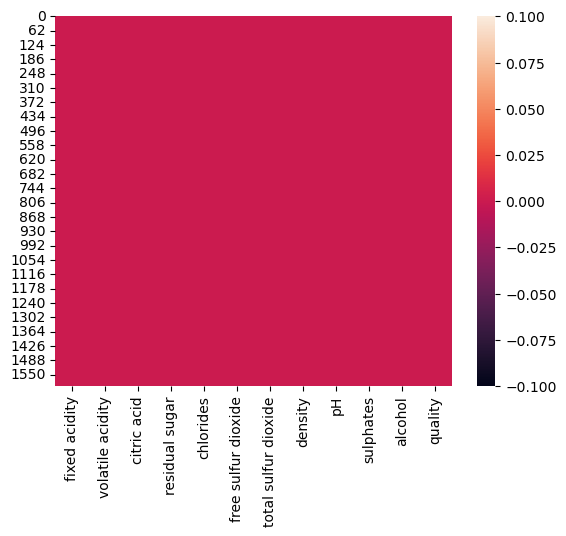

In [12]:
#lets visualize it using heatmap
sns.heatmap(df.isnull())

As observe that there is no null value present in the dataset

In [13]:
df['fixed acidity'].unique()

array([ 7.4,  7.8, 11.2,  7.9,  7.3,  7.5,  6.7,  5.6,  8.9,  8.5,  8.1,
        7.6,  6.9,  6.3,  7.1,  8.3,  5.2,  5.7,  8.8,  6.8,  4.6,  7.7,
        8.7,  6.4,  6.6,  8.6, 10.2,  7. ,  7.2,  9.3,  8. ,  9.7,  6.2,
        5. ,  4.7,  8.4, 10.1,  9.4,  9. ,  8.2,  6.1,  5.8,  9.2, 11.5,
        5.4,  9.6, 12.8, 11. , 11.6, 12. , 15. , 10.8, 11.1, 10. , 12.5,
       11.8, 10.9, 10.3, 11.4,  9.9, 10.4, 13.3, 10.6,  9.8, 13.4, 10.7,
       11.9, 12.4, 12.2, 13.8,  9.1, 13.5, 10.5, 12.6, 14. , 13.7,  9.5,
       12.7, 12.3, 15.6,  5.3, 11.3, 13. ,  6.5, 12.9, 14.3, 15.5, 11.7,
       13.2, 15.9, 12.1,  5.1,  4.9,  5.9,  6. ,  5.5])

In [14]:
df['fixed acidity'].nunique()

96

In [15]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [16]:
df['quality'].nunique()

6

In [17]:
# Step 1: Create binary target variable
df['binary_quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Step 2: Split the data into features (x) and target variable (y)
q = df.drop(['quality', 'binary_quality'], axis=1)  # Features
q_feature=df.drop(["quality"],axis =1)
r = df['binary_quality']  # Target variable

As it is observed that quality column is numerical data type but count of unique value is 6 so  change it binary_quality so that our problem can be termed as classification  and so to predict the quality of red wine using classification model

In [18]:
#checking the value.counts of each columns

for i in q_feature.columns:
    print(df[i].value_counts())
    print('\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [19]:
q_feature.dtypes.index

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'binary_quality'],
      dtype='object')

In [20]:
#checking number of unique values in x dataset
q_feature.nunique().to_frame("No. of unique value")

No. of unique value
fixed acidity                          96
volatile acidity                      143
citric acid                            80
residual sugar                         91
chlorides                             153
free sulfur dioxide                    60
total sulfur dioxide                  144
density                               436
pH                                     89
sulphates                              96
alcohol                                65
binary_quality                          2

Here we can find that all the columns has different unique value so required for analysis 

In [21]:
#checking the target column quality unique value
r.unique()

array([0, 1], dtype=int64)

1 is define as good quality while 0 is not good

Converting y target variable into y in 1 good quality wine where 0 as not good 

In [22]:
# Statistical summary of numerical columns
q.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

In [23]:
r.describe()

count    1599.000000
mean        0.135710
std         0.342587
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: binary_quality, dtype: float64

This gives the statistical information of the numerical columns.The summary of dataset looks perfect as it doesnot have any null value, negative, invalid values present
1 The count of all the columns is same as it means there is no missing values 
2 For fixed acidity and total sulfur dioxide mean greater than medain/50% represent right skewness in data if median>mean represent left skewness can be reduced by boxcox method
3 We can observe there is huge difference b/w 75% and max hence there are outliers present in dataset example max is seen residual sugar,free sulphur dioxide,total sulfur dioxide then medium fixed acidity,alcohol.
4 We can also notice std deviation , min,25% percentile values from this decribe method

# Data Visualization

# Univariate Analysis

0    1382
1     217
Name: binary_quality, dtype: int64


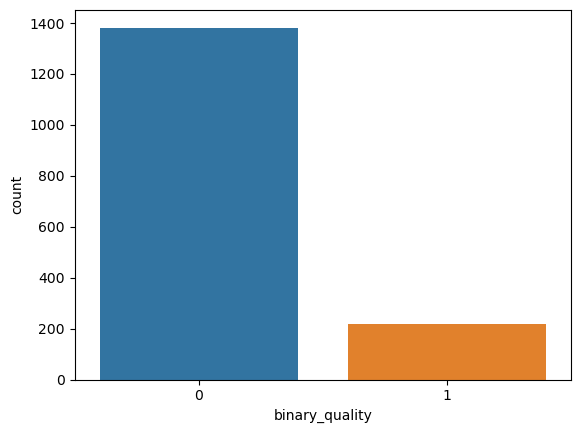

In [24]:
#Visualize the number of label target as quality

cc=sns.countplot(x='binary_quality',data=q_feature)
print(r.value_counts())

We can observe that the count of the verygood(1) quality of red wine is approx 200 and 0 not good quality of red wine is around 200 as we can se biaseness the target variable have to overcome this class imbalance in the dataset. We will rectify it by using oversampling method in later part

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


<Axes: xlabel='fixed acidity', ylabel='count'>

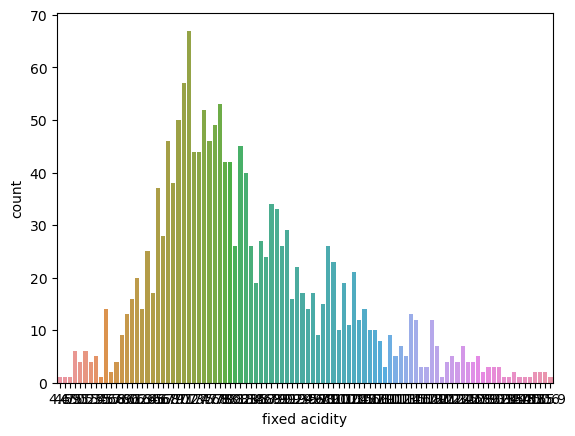

In [25]:
#Visualizing the count of fixed acidity
print(q["fixed acidity"].value_counts())
sns.countplot(x="fixed acidity",data=q)


As the graph show the dataset is  unbalanced or  as maximum density of count lies in range value of fixed acidity 7.0-7.2

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


<Axes: xlabel='volatile acidity', ylabel='count'>

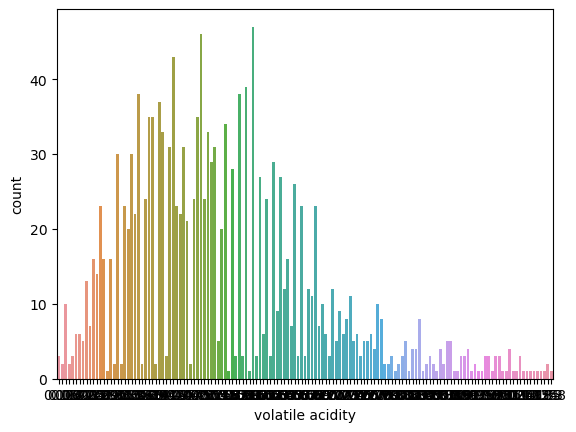

In [26]:
#Visualizing the count of fixed acidity
print(q["volatile acidity"].value_counts())
sns.countplot(x="volatile acidity",data=q)

volatile acidity  column is also non uniformly distributed column so analysis of this column is not ideal for analysis

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11

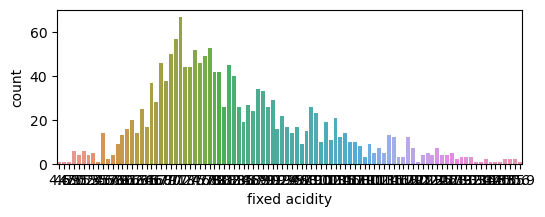

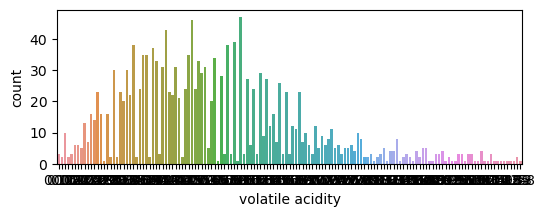

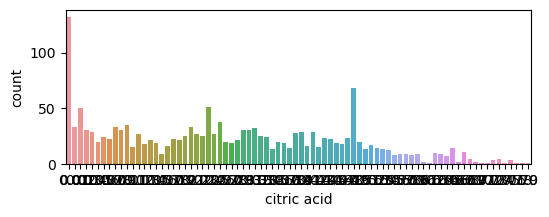

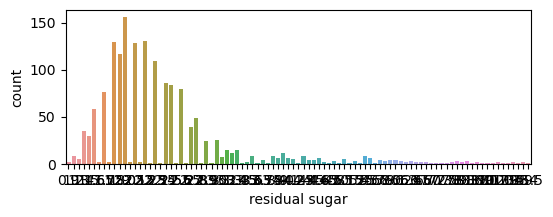

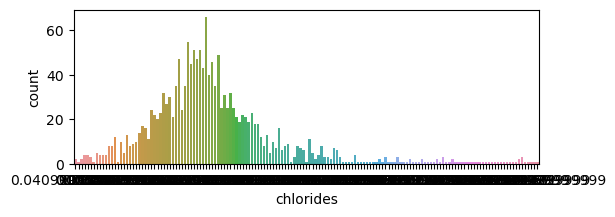

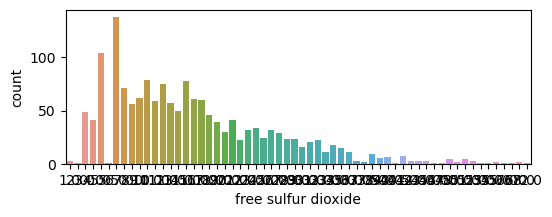

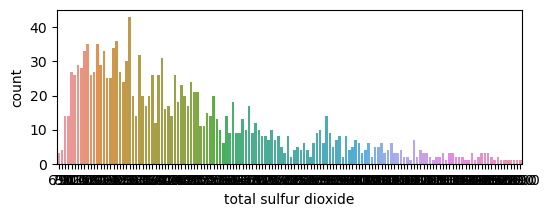

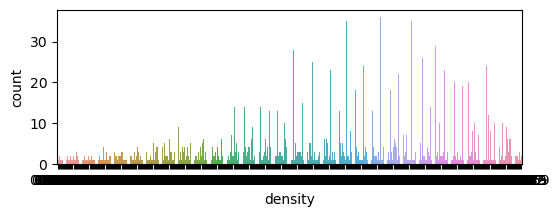

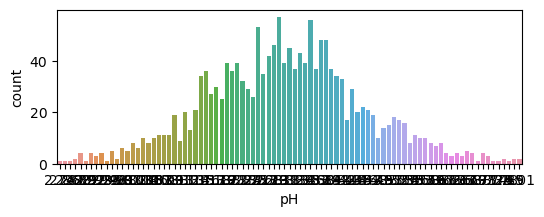

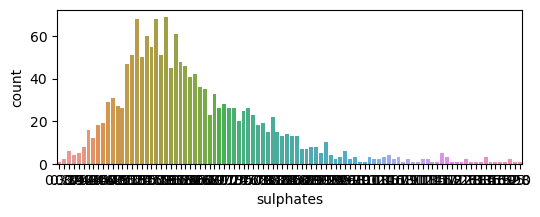

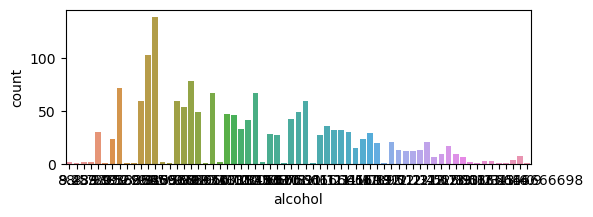

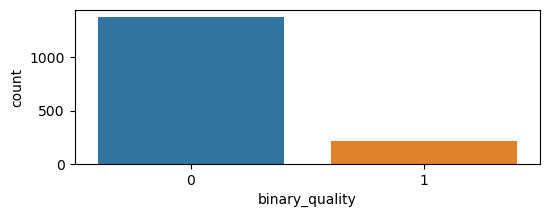

In [27]:
#checking the count of each variable using count plot
for i in q_feature.columns:
    print(df[i].value_counts())
    plt.figure(figsize=(6,2),facecolor="white")
    sns.countplot(x=df[i],data=q_feature)
plt.show()

# Checking the distribution of the data by using distplot

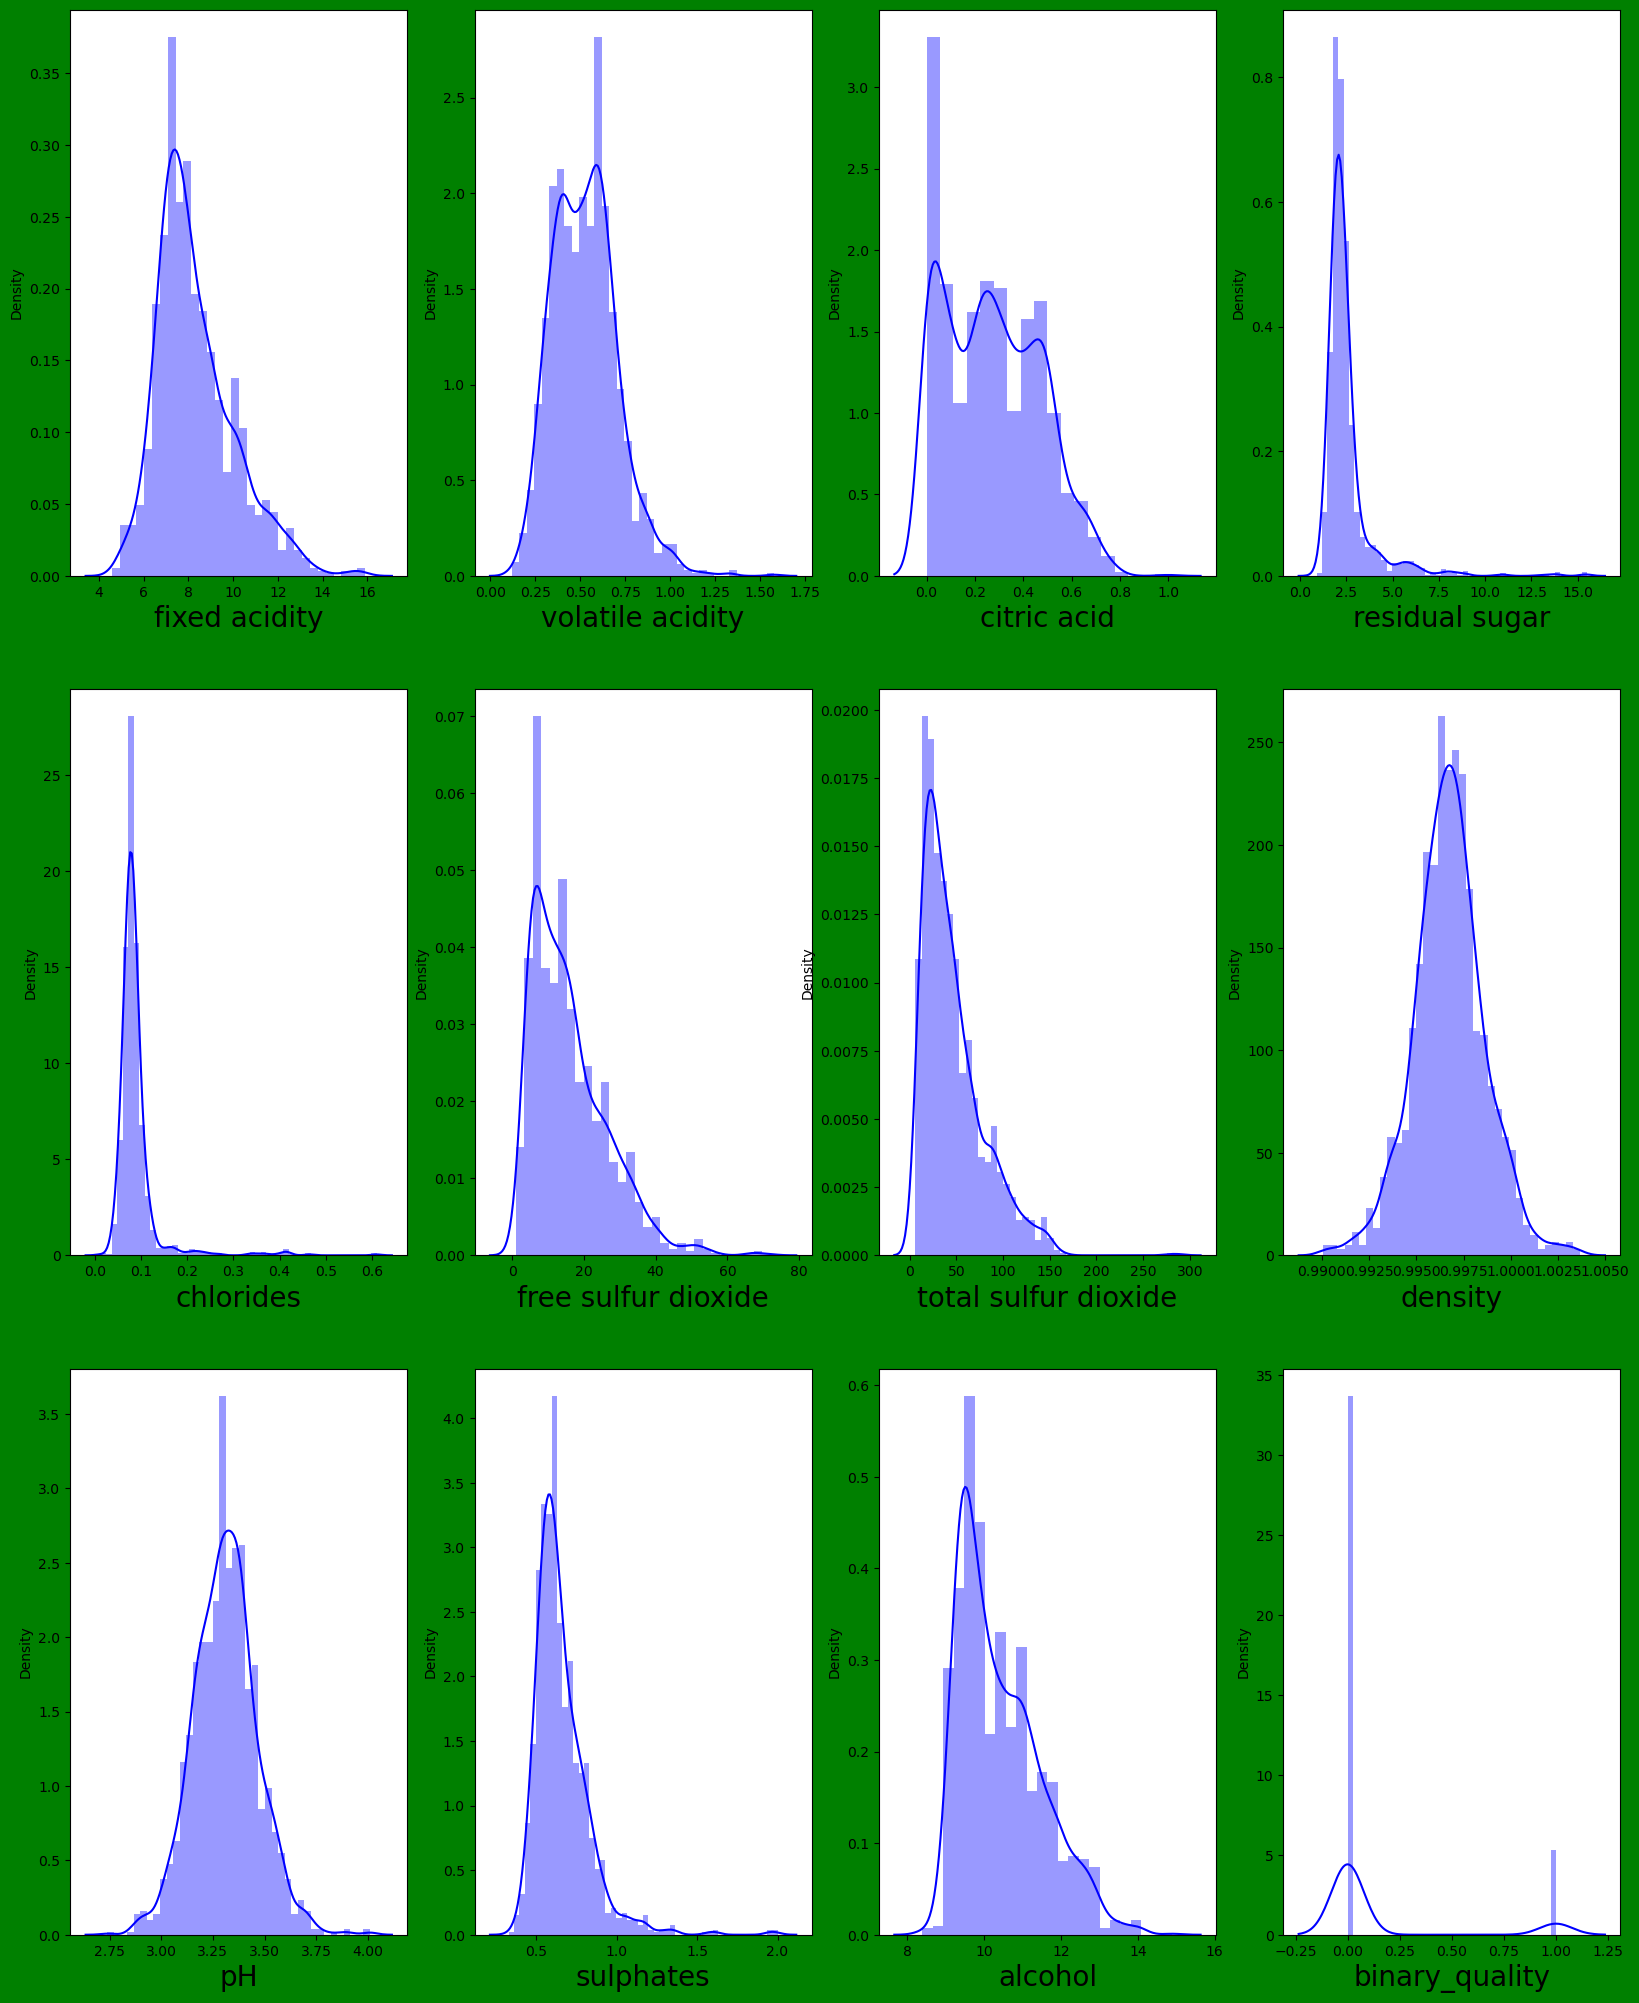

In [28]:
plt.figure(figsize=(20,25),facecolor="green")
p=1
for col in q_feature.columns:
    if p<=12:
        plt.subplot(3,4,p)
        sns.distplot(df[col],color="b")
        plt.xlabel(col,fontsize = 20)
    p+=1
plt.show()

 From the above distribution plot we can notice that data looks normal in all columns except for residual sugar,chlorides,sulphates 

In [29]:
q.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

# Removing Skewness

In [30]:
#Removing Skewness using cube root method
q["residual sugar"]=np.cbrt(q["residual sugar"])
q["chlorides"]=np.cbrt(q["chlorides"])
q["free sulfur dioxide"]=np.cbrt(q["free sulfur dioxide"])
q["total sulfur dioxide"]=np.cbrt(q["total sulfur dioxide"])
q["sulphates"]=np.cbrt(q["sulphates"])

In [31]:
q.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               1.322148
alcohol                 0.860829
dtype: float64

# Bivariate Analysis

<Figure size 600x200 with 0 Axes>

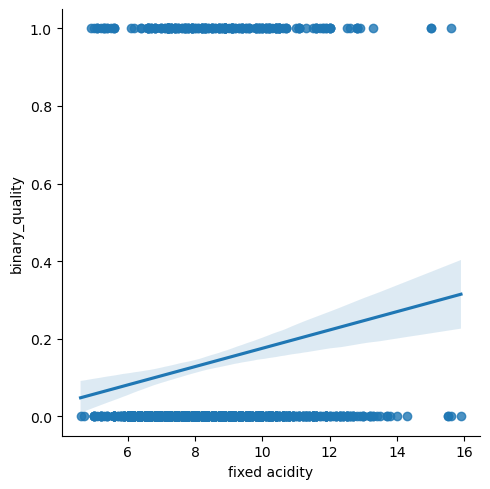

<Figure size 600x200 with 0 Axes>

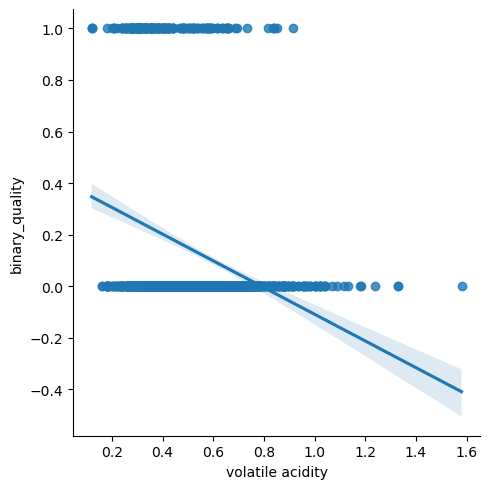

<Figure size 600x200 with 0 Axes>

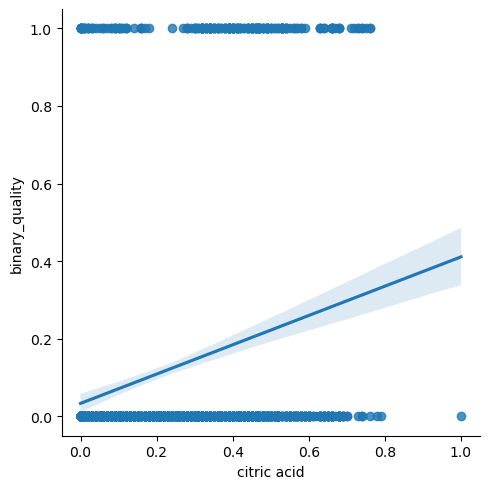

<Figure size 600x200 with 0 Axes>

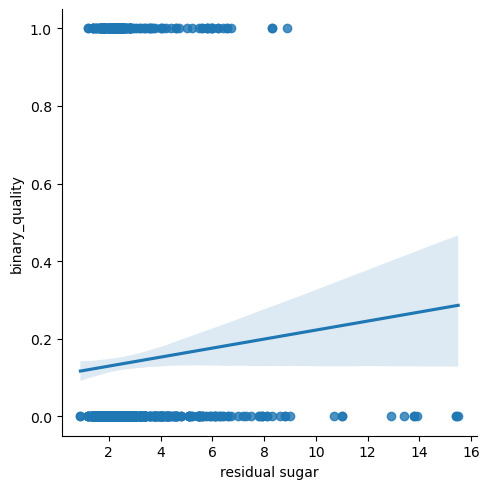

<Figure size 600x200 with 0 Axes>

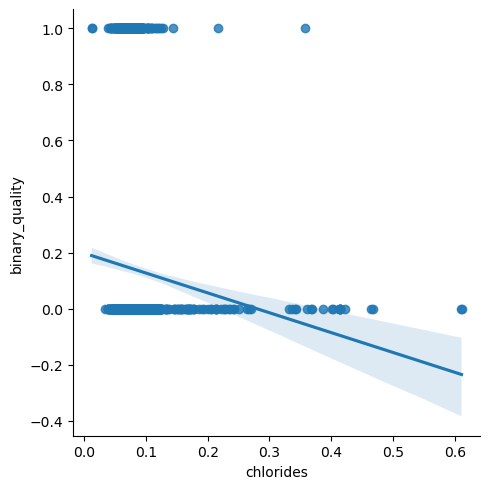

<Figure size 600x200 with 0 Axes>

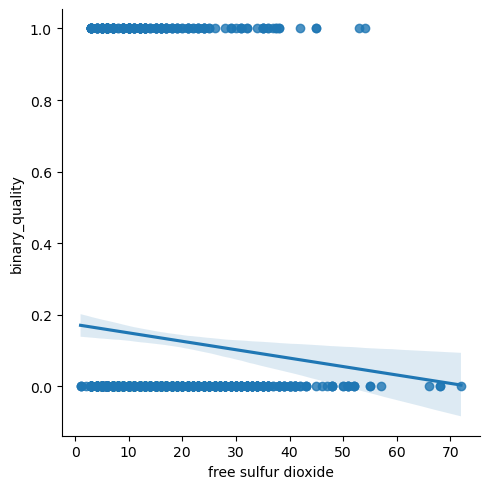

<Figure size 600x200 with 0 Axes>

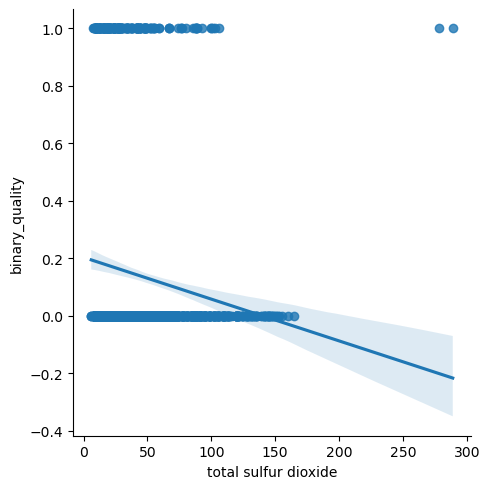

<Figure size 600x200 with 0 Axes>

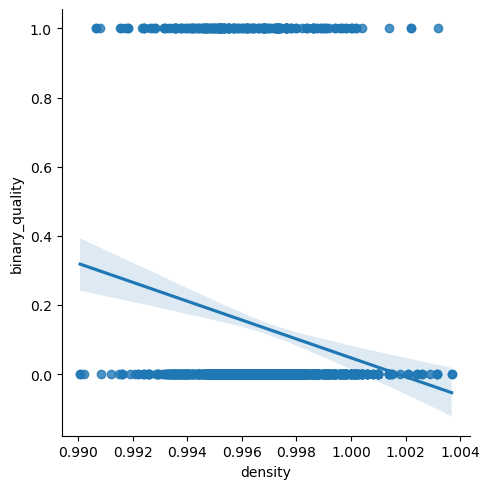

<Figure size 600x200 with 0 Axes>

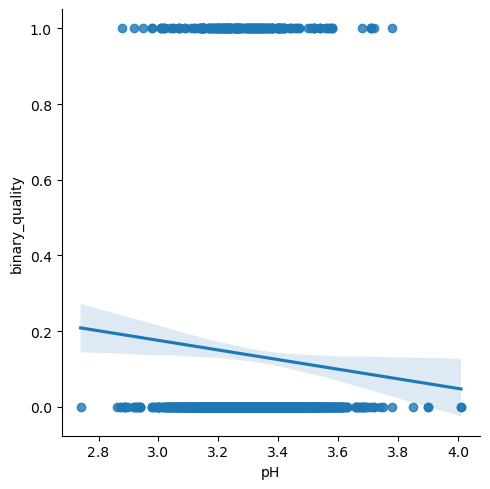

<Figure size 600x200 with 0 Axes>

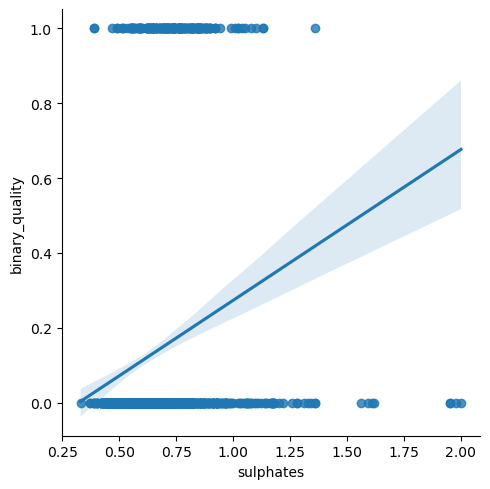

<Figure size 600x200 with 0 Axes>

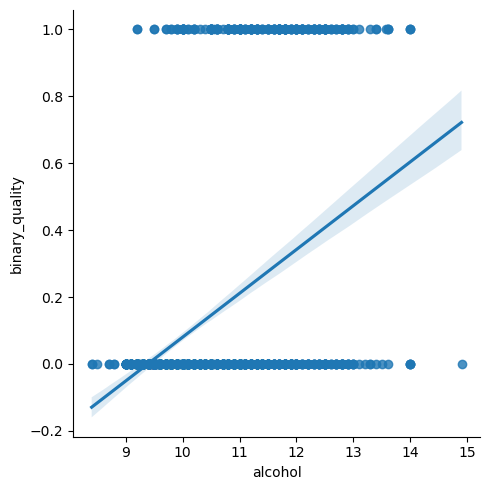

<Figure size 600x200 with 0 Axes>

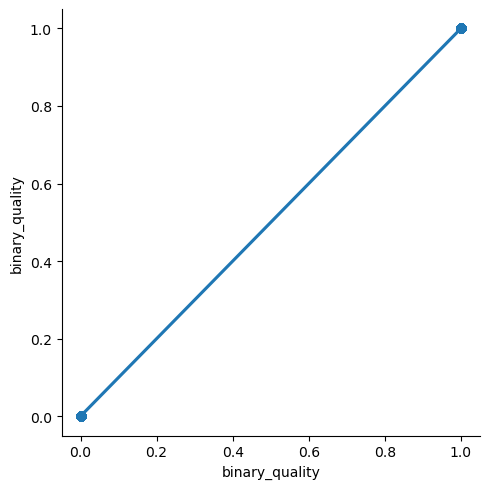

In [32]:
for i in q_feature.columns:
    plt.figure(figsize=(6,2),facecolor="white")
    sns.lmplot(x=i,y="binary_quality",data=q_feature,palette="colorblind")
    plt.xlabel(i)
    plt.ylabel("binary_quality")
plt.show()

As there is class imbalnce so density count of 0 is high also  show that low value of alcohol level can also produce 1 quality of wine the only difference is in density this analysis is shown in all column using lmplot

Text(29.000000000000007, 0.5, 'volatile acidity')

<Figure size 600x200 with 0 Axes>

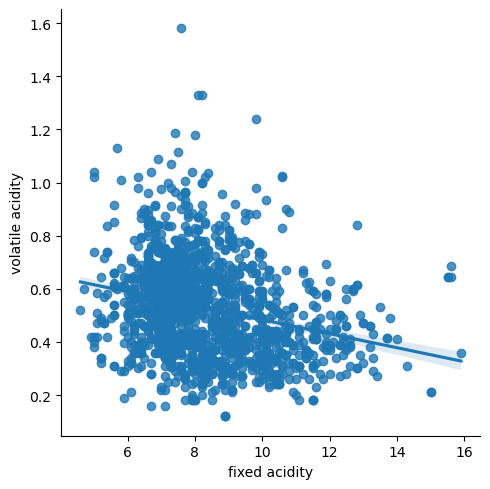

In [33]:
plt.figure(figsize=(6,2),facecolor="white")

sns.lmplot(x="fixed acidity",y="volatile acidity",data=q,palette="colorblind")
plt.xlabel("fixed acidity")
plt.ylabel("volatile acidity")

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

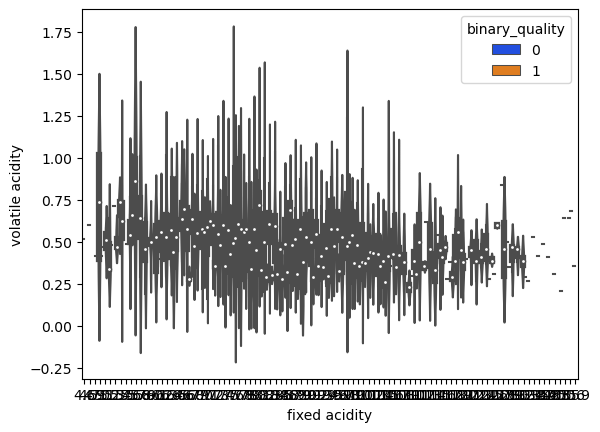

In [34]:
sns.violinplot(x="fixed acidity",y="volatile acidity",hue="binary_quality",data=q_feature,palette="bright")

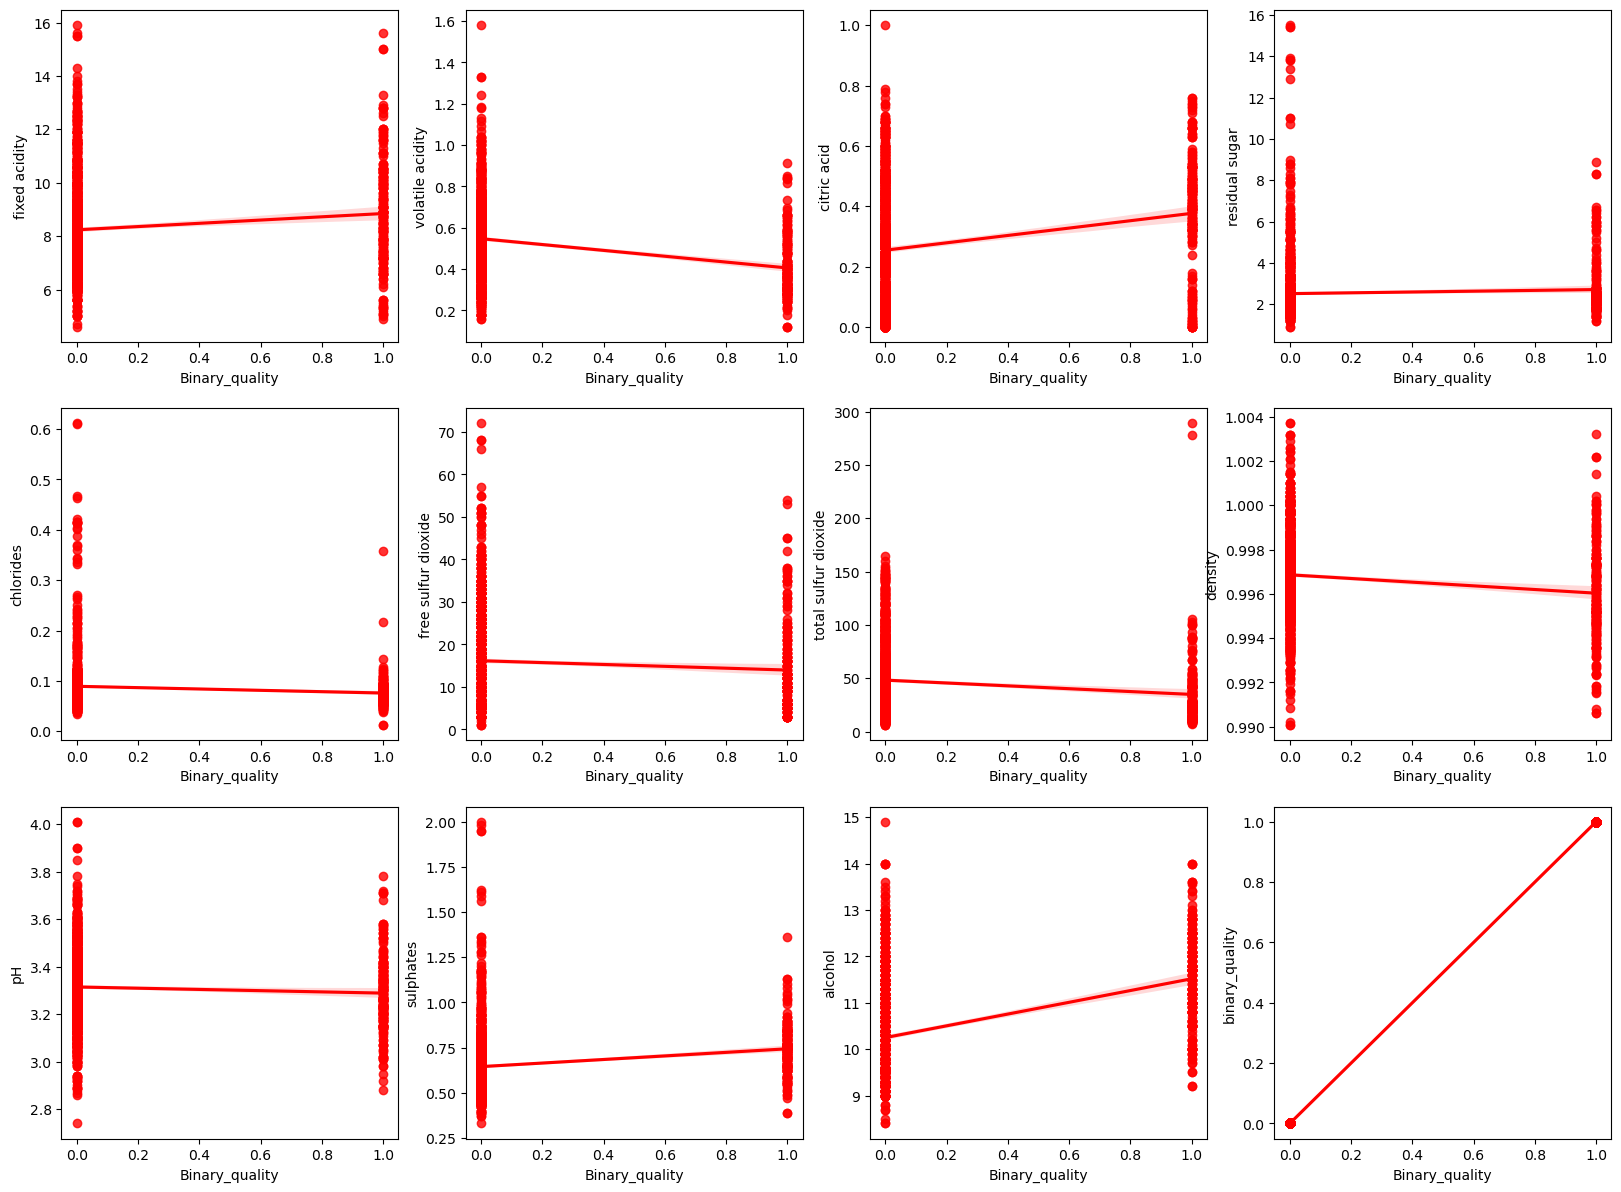

In [35]:
#Comparing quality with other columns using regresion plot to find any relationship 
plt.figure(figsize=(20,25))
p=1
for i in q_feature:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x="binary_quality",y=i, data =q_feature,color='r')
        plt.xlabel("Binary_quality")
        plt.ylabel(i)
    p+=1
plt.show()

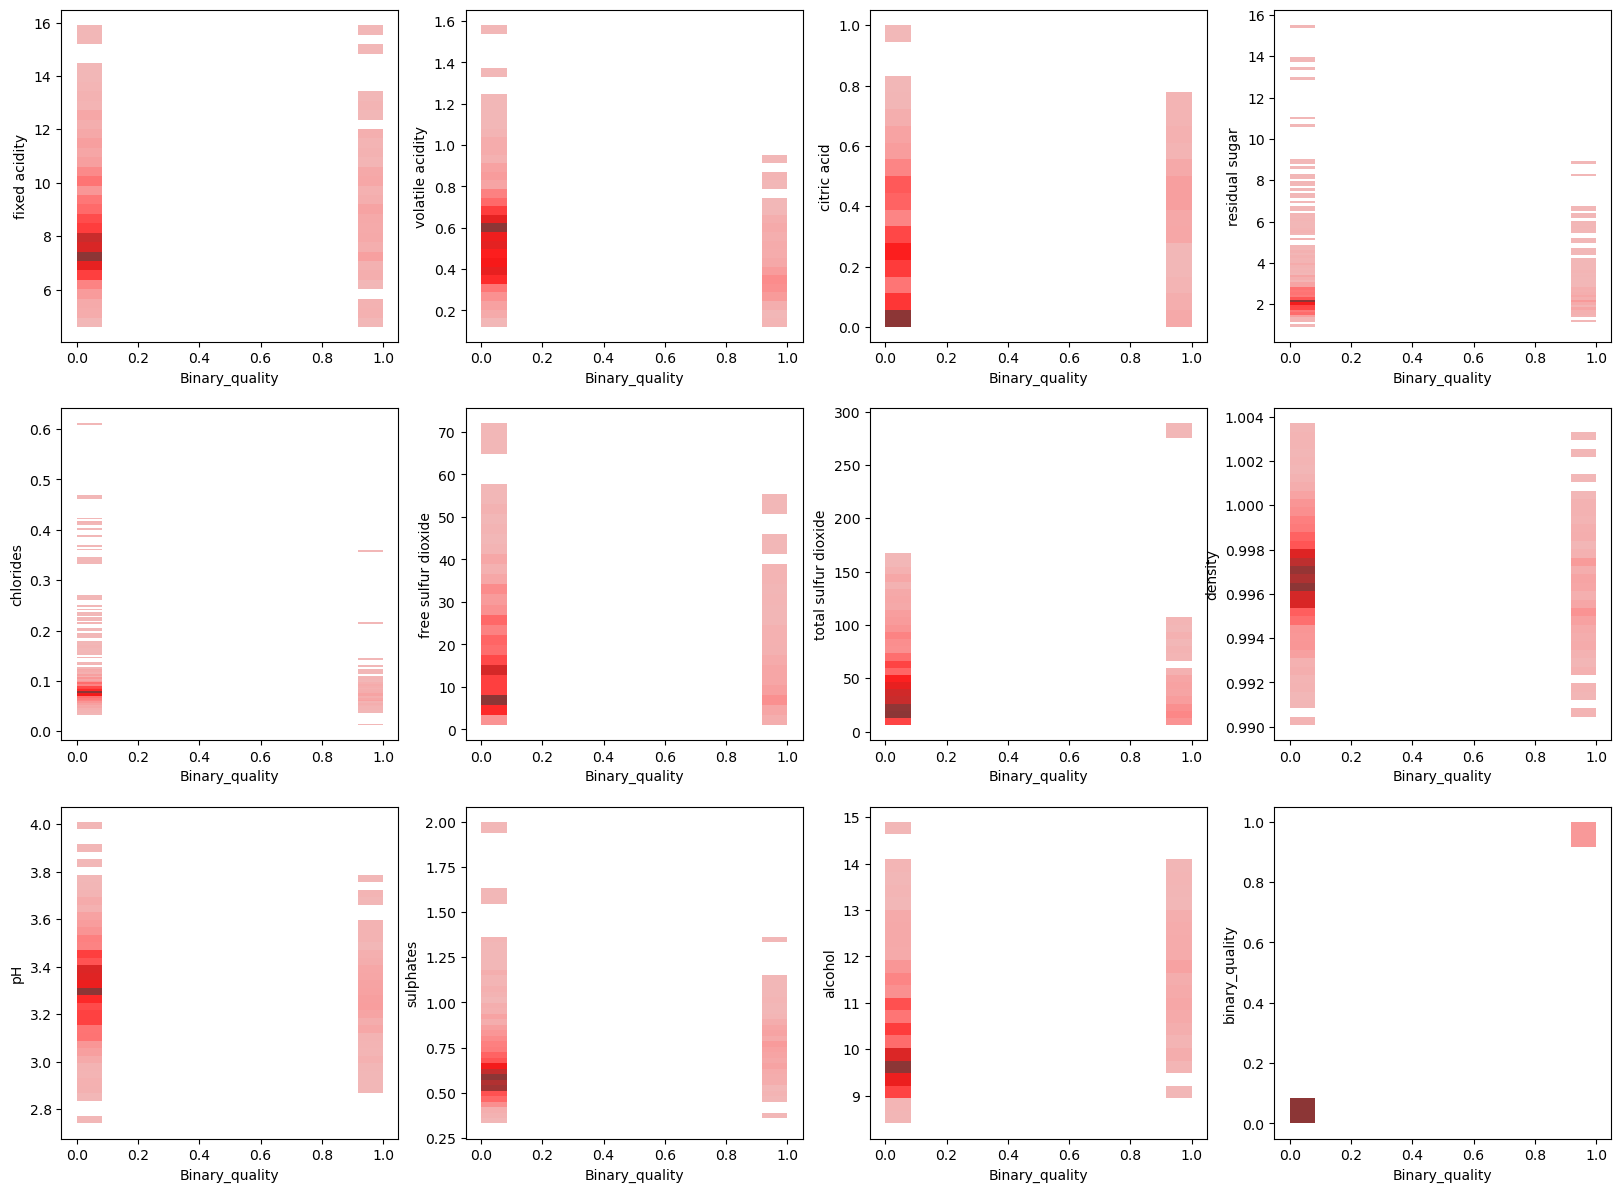

In [74]:
#Comparing quality with other columns using histplot plot to find any relationship 
plt.figure(figsize=(20,25))
p=1
for i in q_feature:
    if p<=17:
        plt.subplot(5,4,p)
        sns.histplot(x="binary_quality",y=i, data =q_feature,color='r')
        plt.xlabel("Binary_quality")
        plt.ylabel(i)
    p+=1

From above histplot we can analyse that min and max value of all the column remain same for 0 ,1 quality of wine the only difference is in density or count of independent variable

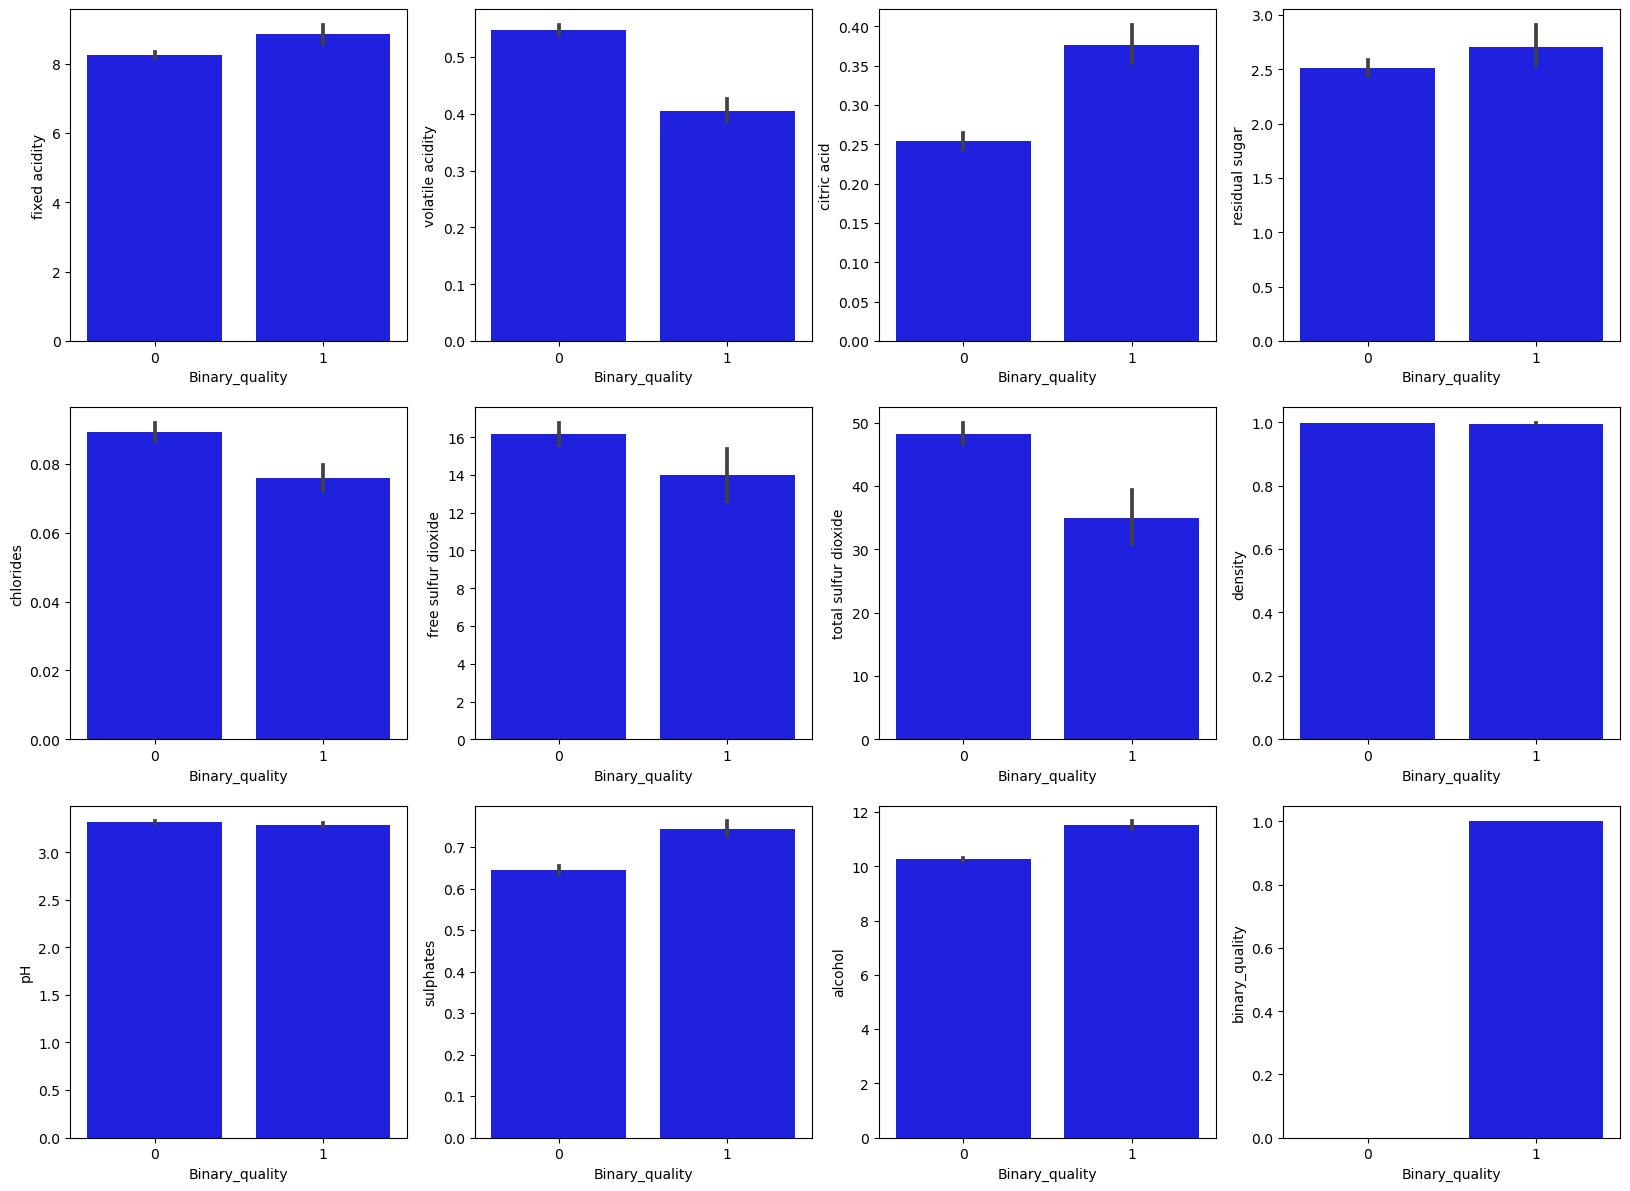

In [76]:
#Comparing quality with other columns using barplot plot to find any relationship 
plt.figure(figsize=(20,25))
p=1
for i in q_feature:
    if p<=17:
        plt.subplot(5,4,p)
        sns.barplot(x="binary_quality",y=i, data =q_feature,color='b')
        plt.xlabel("Binary_quality")
        plt.ylabel(i)
    p+=1

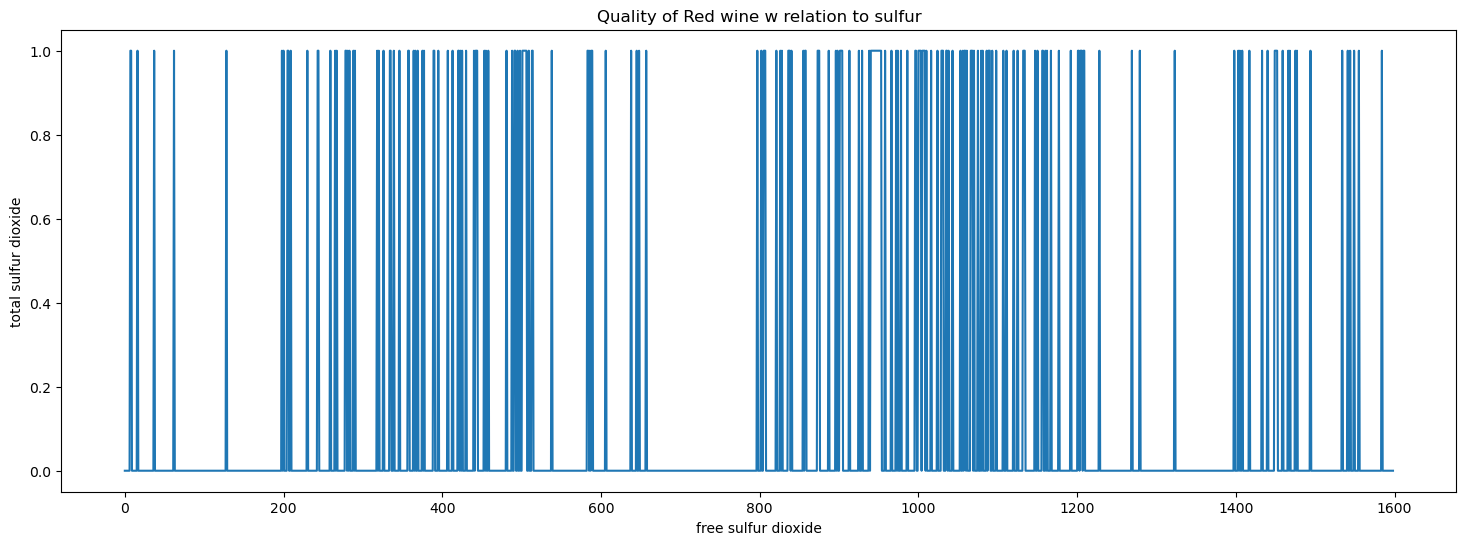

In [36]:
plt.figure(figsize=(18,6))
plt.plot(q_feature["binary_quality"],label="Quality of Red wine")
plt.ylabel("total sulfur dioxide")
plt.xlabel("free sulfur dioxide")
plt.title("Quality of Red wine w relation to sulfur")
plt.show()

As we can seen no significance to quality with respect to sulfur dioxide content

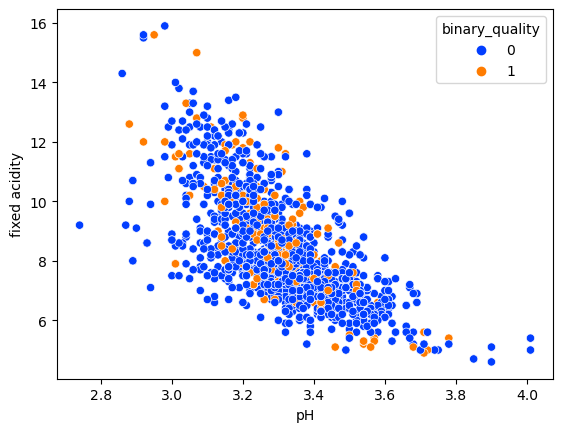

In [37]:
#Comparing quality with other columns using scatter plot to find any relationship 

plt.title("")
sns.scatterplot(x="pH",y="fixed acidity",data=q_feature,hue="binary_quality",palette="bright")
plt.show()


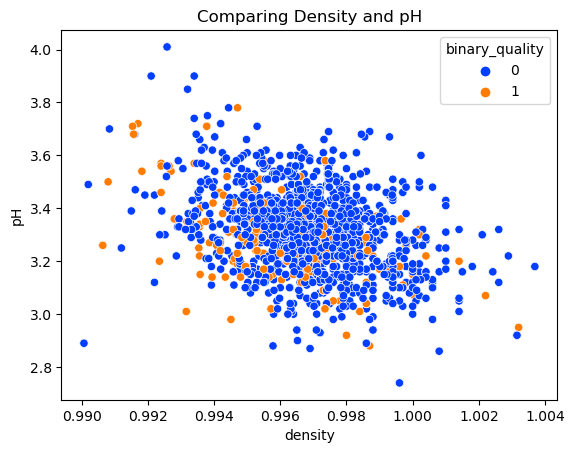

In [38]:
plt.title("Comparing Density and pH")
sns.scatterplot(x="density",y="pH",data=q_feature,hue="binary_quality",palette="bright")
plt.show()

As the value count 0 are high plot show that density is low than 1 and pH value in range 3.0-3.6 quality is 1 basically means good quality wine

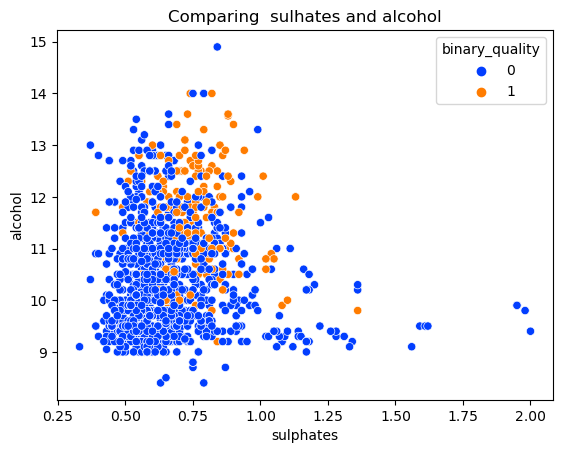

In [39]:
plt.title("Comparing  sulhates and alcohol")
sns.scatterplot(x="sulphates",y="alcohol",data=q_feature,hue="binary_quality",palette="bright")
plt.show()

# Violinplot

<Axes: xlabel='binary_quality', ylabel='alcohol'>

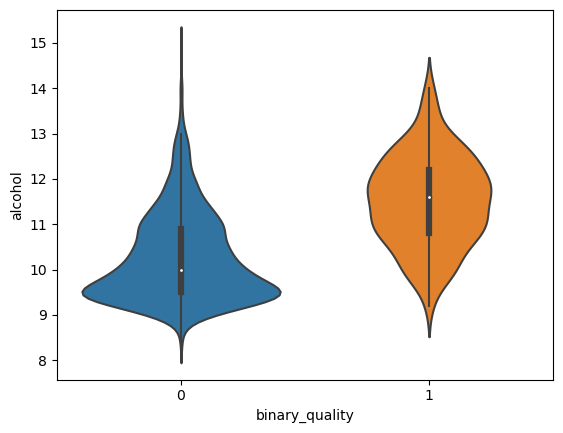

In [40]:
sns.violinplot(x='binary_quality', y='alcohol', data=q_feature)

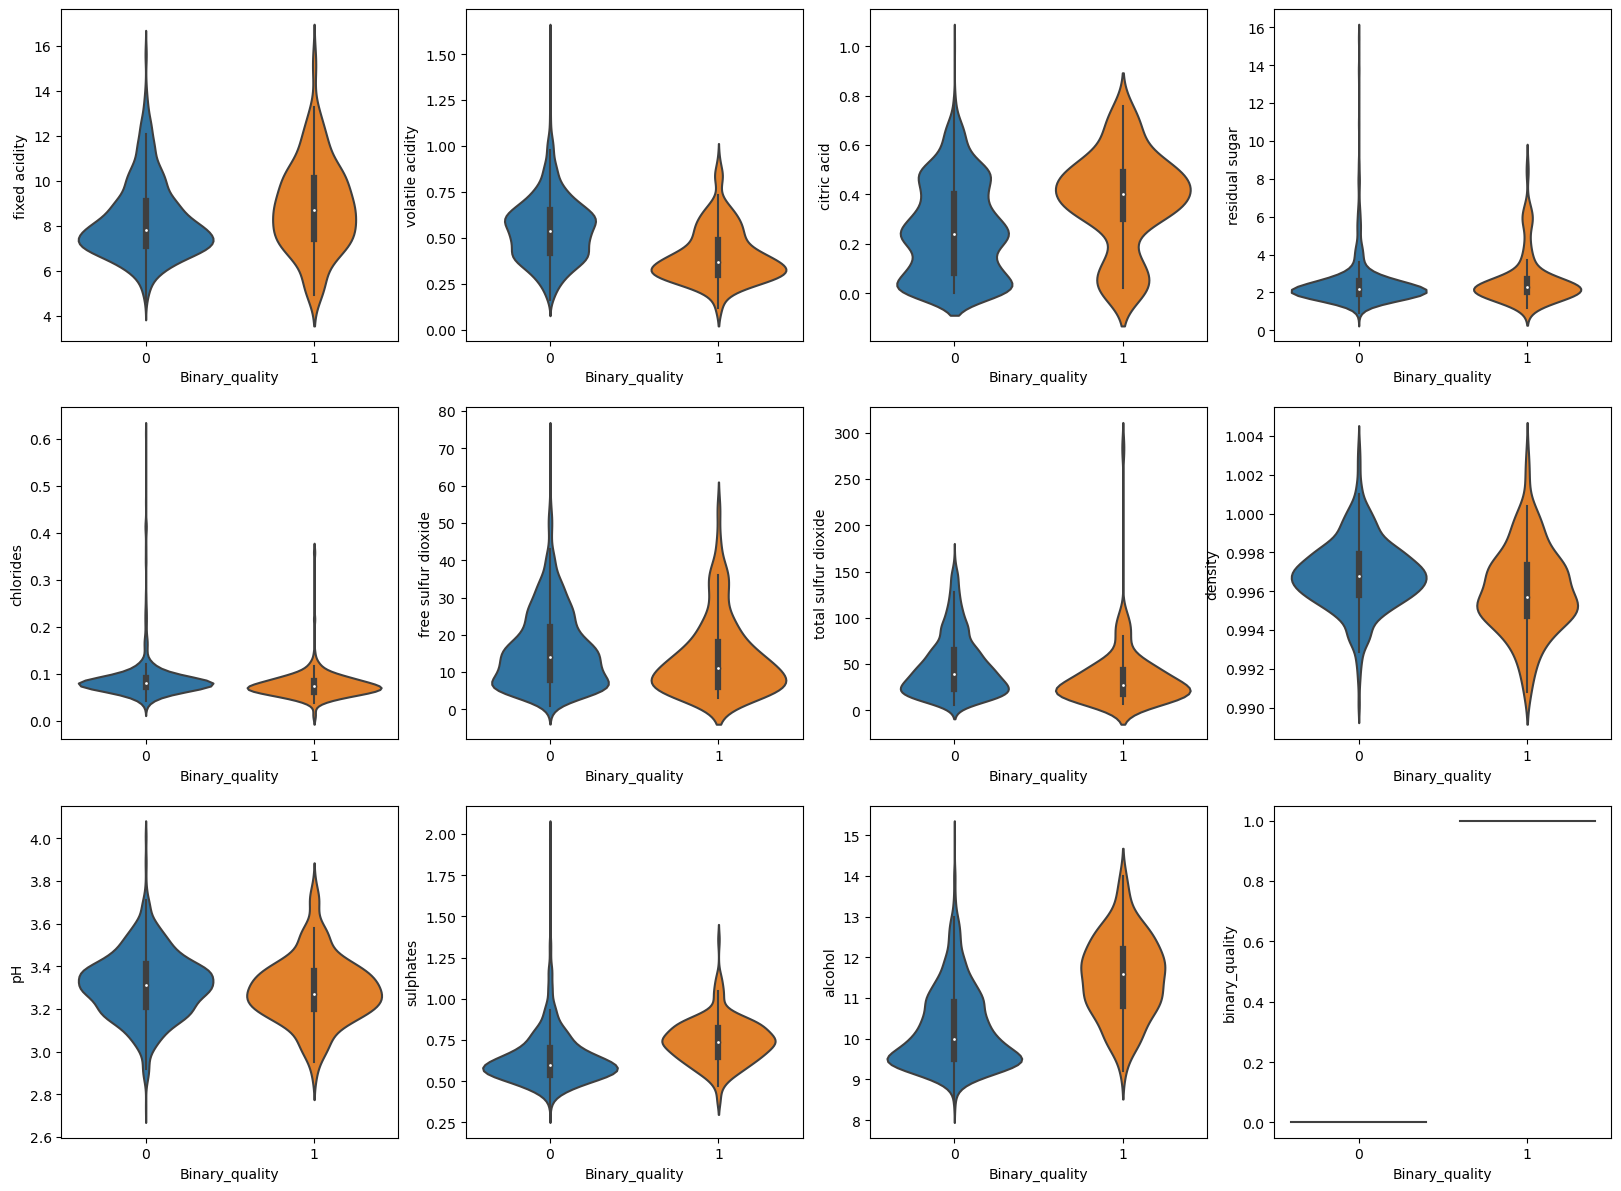

In [77]:
#Comparing quality with other columns using Violin plot to find any relationship 
plt.figure(figsize=(20,25))
p=1
for i in q_feature:
    if p<=17:
        plt.subplot(5,4,p)
        sns.violinplot(x="binary_quality",y=i, data =q_feature)
        plt.xlabel("Binary_quality")
        plt.ylabel(i)
    p+=1

From the above graph represent value range for 1 in alcohol us 11-12, sulphates is 0.75 approx, pH is 3.2-3.4,density is 0.995 all the independent variable ideal value for good quality wine can be find using violin plot

# Multivariate analysis 

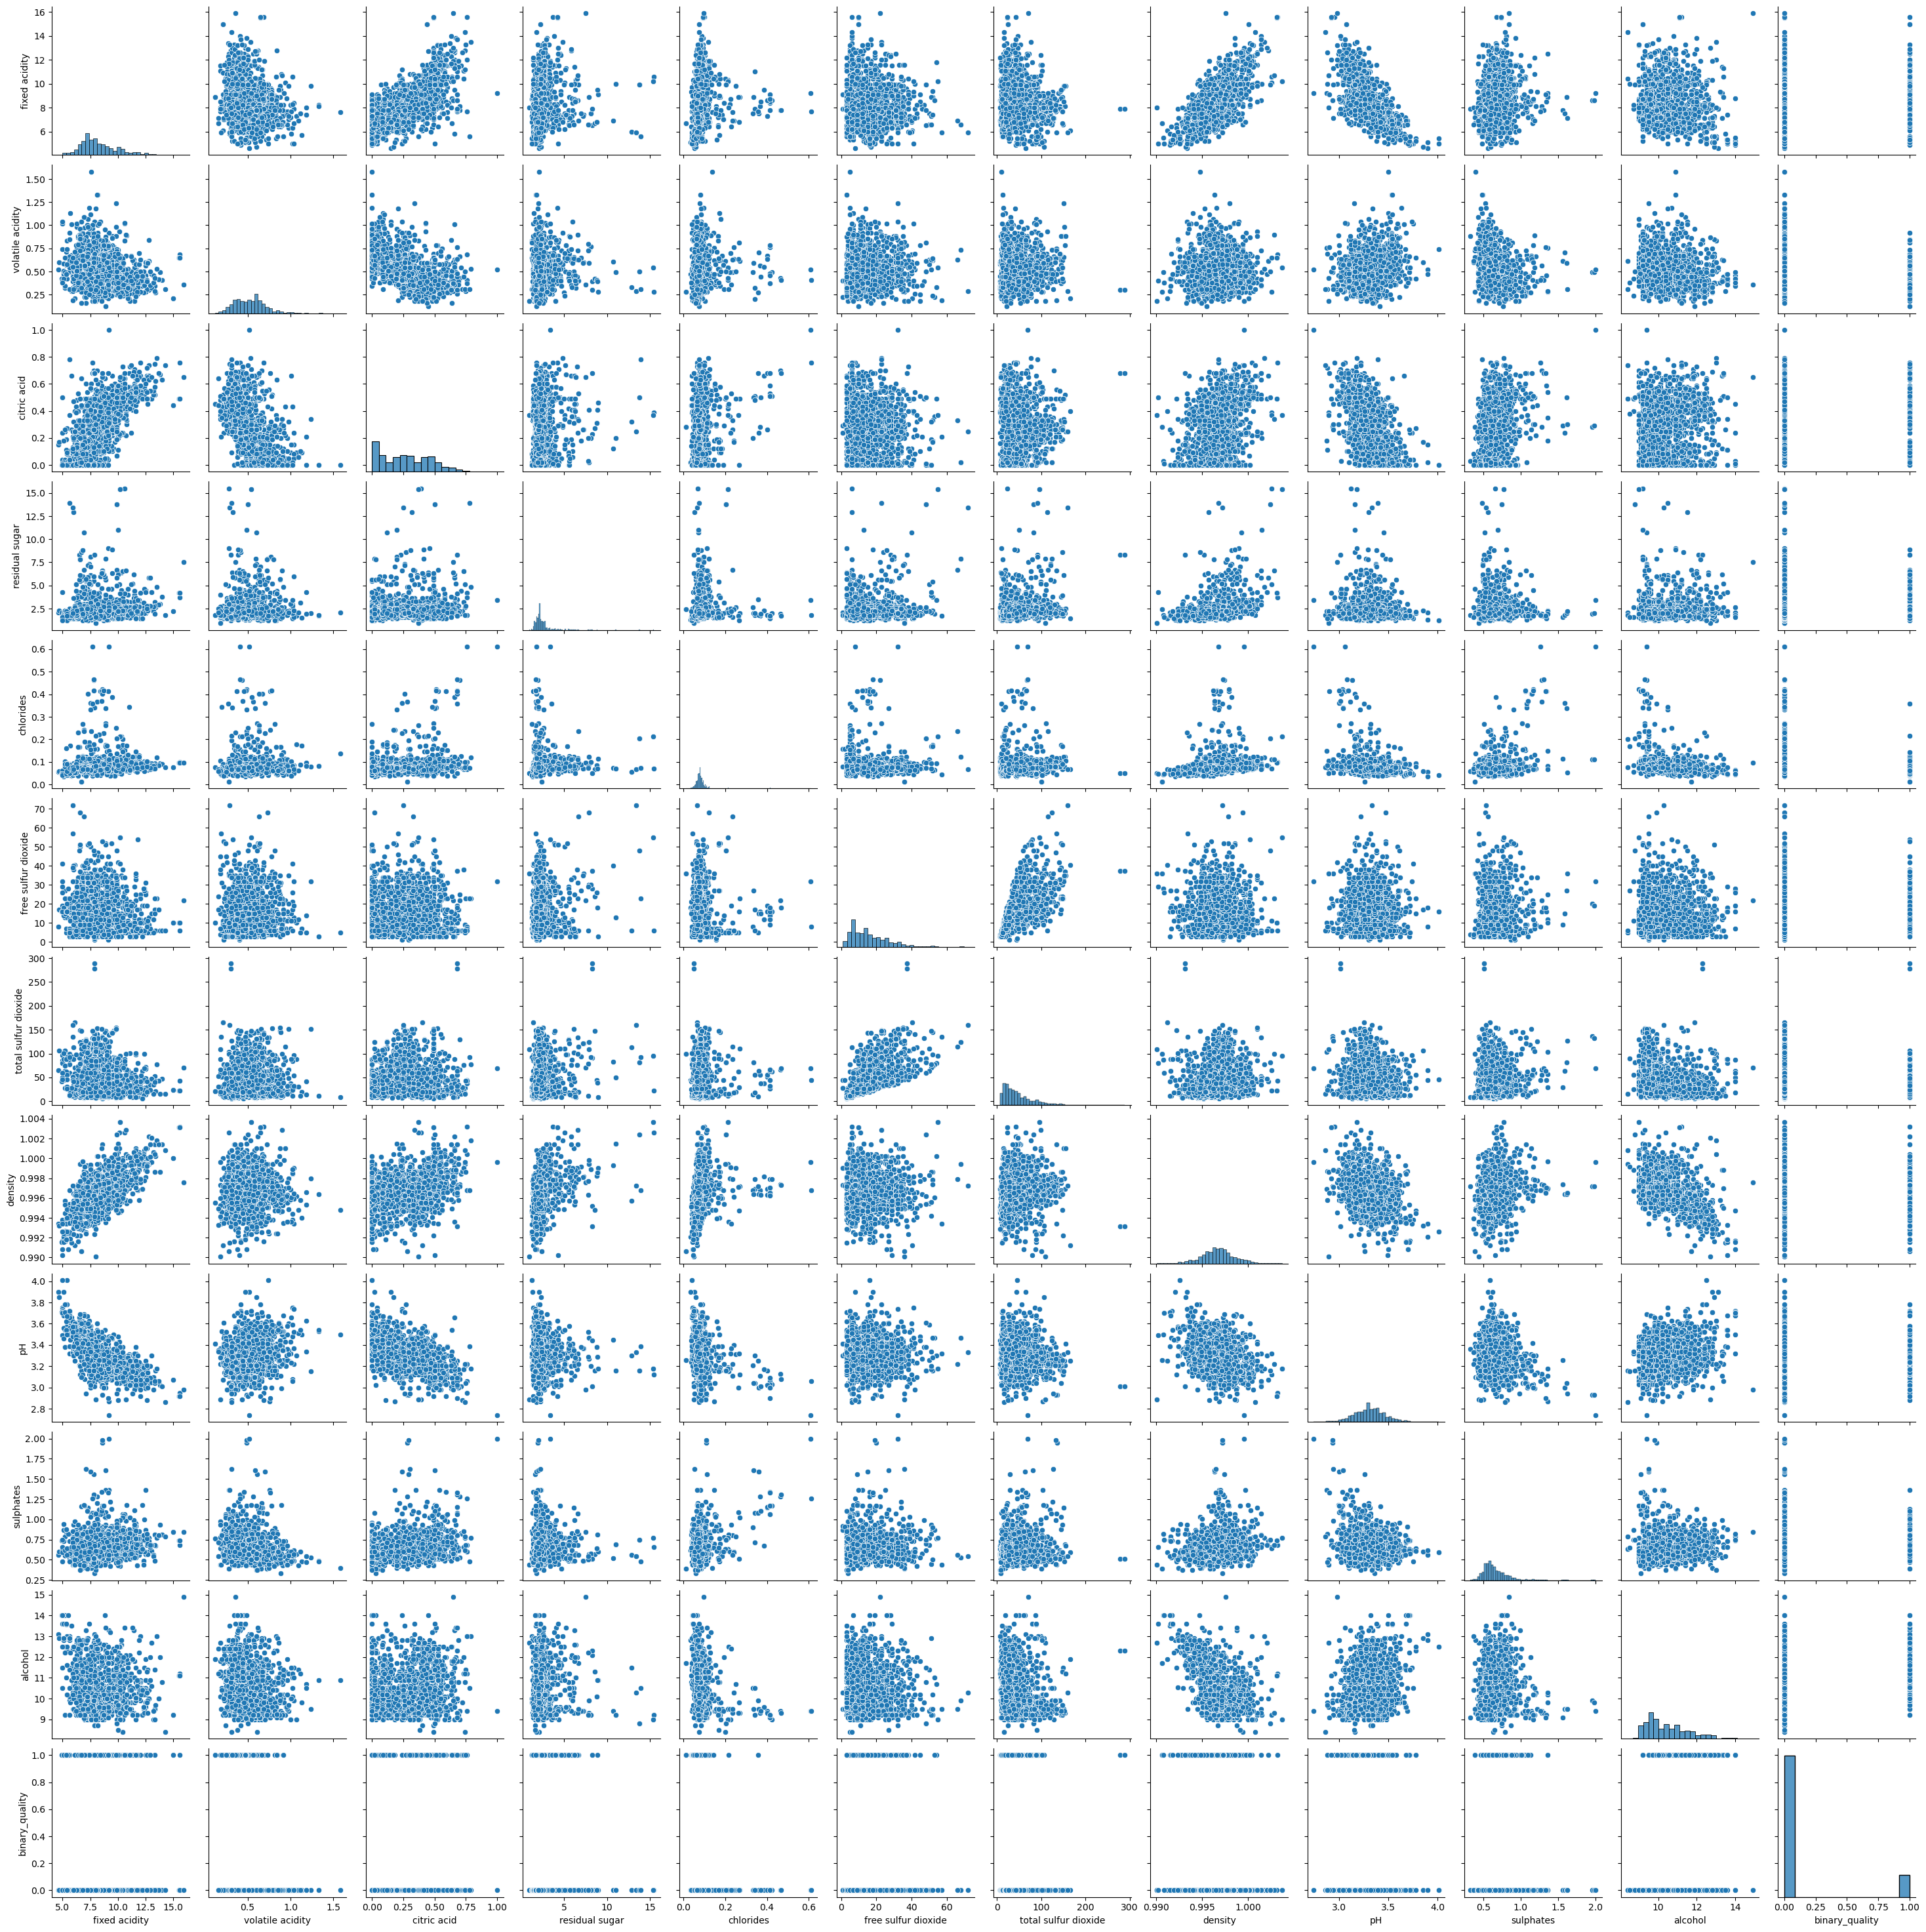

In [41]:
sns.pairplot(data=q_feature)

# Checking for Outliers

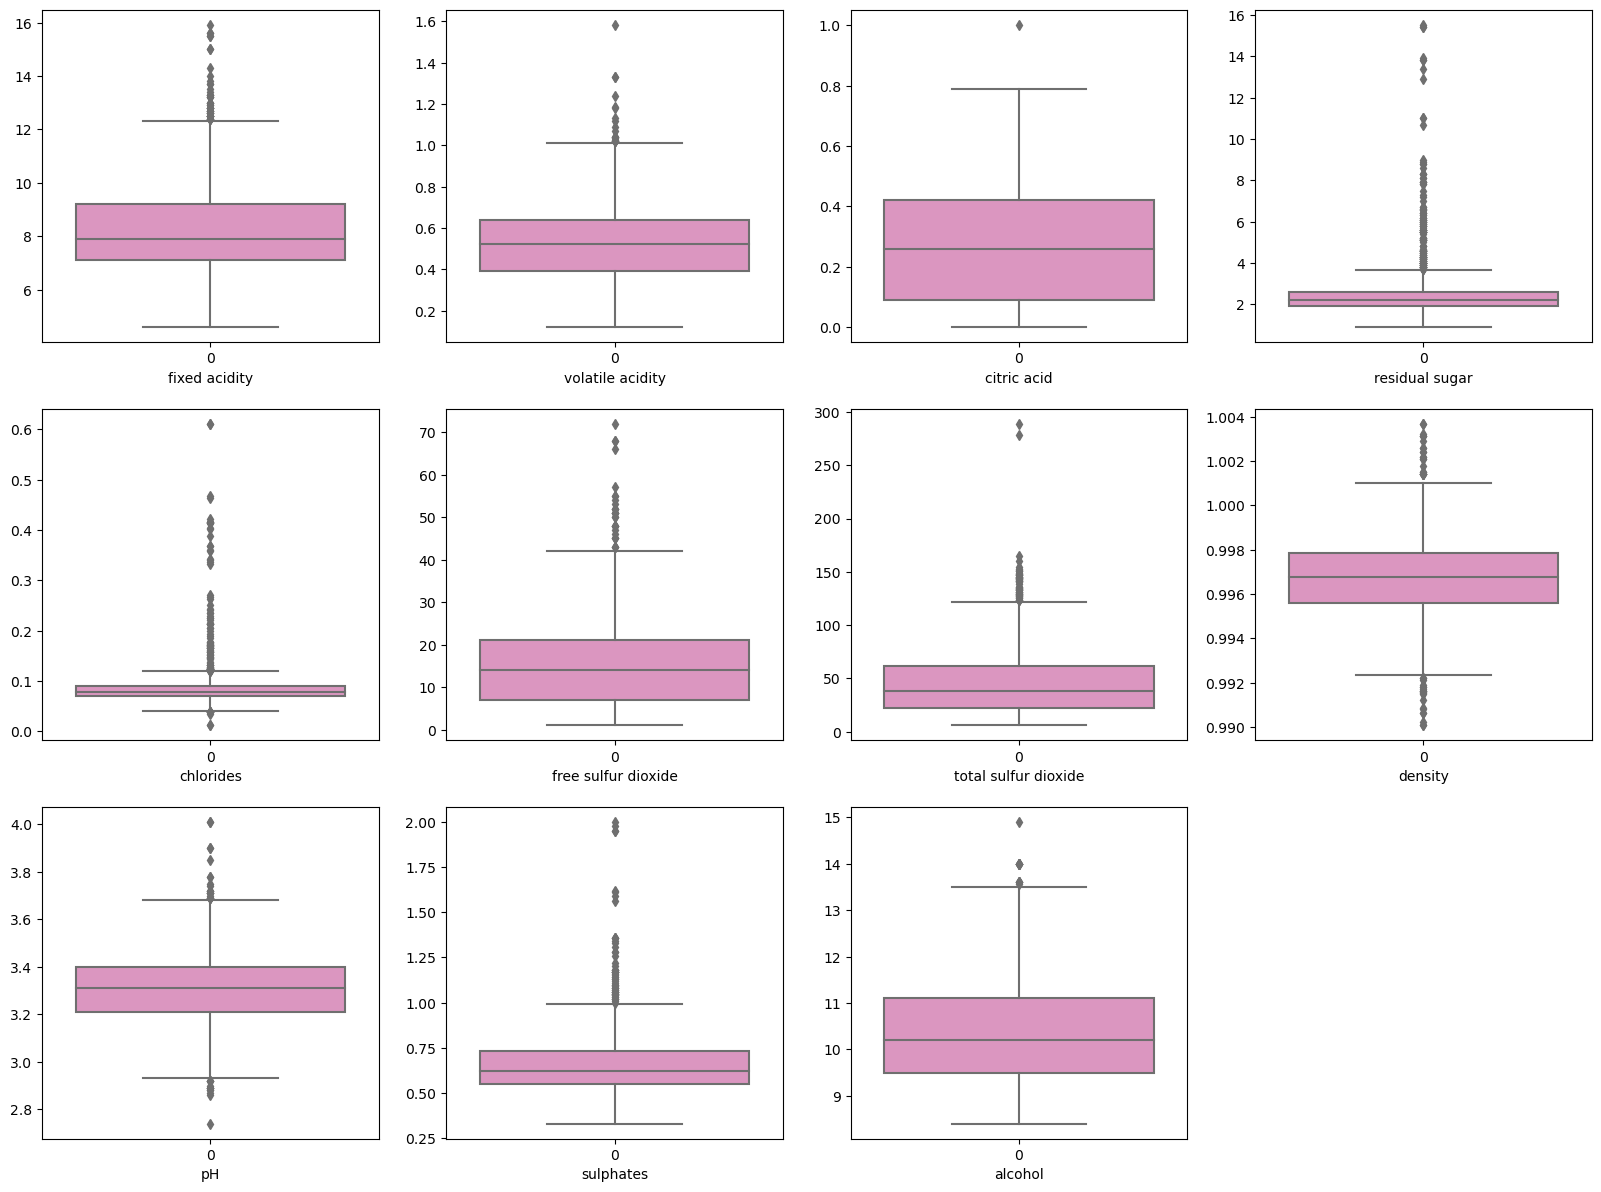

In [42]:
#Checking for Outliers using boxplot
plt.figure(figsize=(20,25))
p=1
for i in q:
    if p<=12:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette = "Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()
        

As we can seen that maximun every independent variable has outlier present in dataset except for citric acid which has few outliers present

 So removing outlier using z-score and IQR techniques before building the model and selected the best one

from scipy.stats import zscore

up_variable=q.iloc[:,:]
z=np.abs(zscore(up_variable))
z

In [44]:
# threshold =3
np.where(z>3)

(array([  13,   17,   17,   19,   33,   38,   42,   45,   81,   81,   83,
          86,   88,   91,   92,   95,  106,  106,  120,  126,  127,  142,
         144,  147,  151,  151,  151,  151,  163,  164,  169,  169,  181,
         199,  226,  226,  240,  243,  244,  258,  258,  274,  281,  291,
         308,  324,  325,  339,  347,  374,  381,  391,  396,  396,  400,
         400,  413,  442,  442,  451,  467,  480,  480,  494,  544,  554,
         554,  555,  555,  557,  557,  566,  567,  568,  588,  595,  608,
         614,  639,  649,  652,  652,  652,  666,  672,  690,  692,  695,
         723,  724,  730,  754,  776,  777,  821,  836,  836,  837,  837,
         889,  911,  917,  923, 1017, 1018, 1043, 1051, 1051, 1071, 1074,
        1079, 1079, 1081, 1081, 1098, 1111, 1114, 1165, 1186, 1235, 1244,
        1244, 1260, 1269, 1269, 1270, 1270, 1299, 1300, 1312, 1316, 1319,
        1319, 1321, 1370, 1372, 1374, 1434, 1434, 1434, 1435, 1435, 1435,
        1474, 1474, 1476, 1476, 1558, 

In [45]:
z.iloc[13,9]

4.412780457877095

In [46]:
df1=q_feature[(z<3).all(axis=1)]

In [47]:
df1.shape

(1481, 12)

In [48]:
q_feature.shape

(1599, 12)

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1481 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1481 non-null   float64
 1   volatile acidity      1481 non-null   float64
 2   citric acid           1481 non-null   float64
 3   residual sugar        1481 non-null   float64
 4   chlorides             1481 non-null   float64
 5   free sulfur dioxide   1481 non-null   float64
 6   total sulfur dioxide  1481 non-null   float64
 7   density               1481 non-null   float64
 8   pH                    1481 non-null   float64
 9   sulphates             1481 non-null   float64
 10  alcohol               1481 non-null   float64
 11  binary_quality        1481 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.4 KB


# correlation between target variable and independent variables

In [50]:
cor=df1.corr()
cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.286068     0.695650   
volatile acidity          -0.286068          1.000000    -0.581294   
citric acid                0.695650         -0.581294     1.000000   
residual sugar             0.166421          0.045477     0.166471   
chlorides                  0.192341          0.092576     0.094641   
free sulfur dioxide       -0.144376          0.012088    -0.075000   
total sulfur dioxide      -0.099750          0.114197     0.013534   
density                    0.659655          0.011097     0.368120   
pH                        -0.696660          0.240415    -0.517432   
sulphates                  0.199193         -0.322429     0.295685   
alcohol                   -0.021762         -0.211739     0.161130   
binary_quality             0.128026         -0.268602     0.225106   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.166421   0.192341            -0.144376   
volatile acidity            0.045477   0.092576             0.012088   
citric acid                 0.166471   0.094641            -0.075000   
residual sugar              1.000000   0.157290             0.033120   
chlorides                   0.157290   1.000000             0.005415   
free sulfur dioxide         0.033120   0.005415             1.000000   
total sulfur dioxide        0.113233   0.097983             0.663174   
density                     0.351239   0.343331            -0.034016   
pH                         -0.077187  -0.188137             0.100350   
sulphates                   0.086473   0.039078             0.063834   
alcohol                     0.140691  -0.221338            -0.077270   
binary_quality              0.101768  -0.128685            -0.078859   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.099750  0.659655 -0.696660   0.199193   
volatile acidity                  0.114197  0.011097  0.240415  -0.322429   
citric acid                       0.013534  0.368120 -0.517432   0.295685   
residual sugar                    0.113233  0.351239 -0.077187   0.086473   
chlorides                         0.097983  0.343331 -0.188137   0.039078   
free sulfur dioxide               0.663174 -0.034016  0.100350   0.063834   
total sulfur dioxide              1.000000  0.116429 -0.022468  -0.011396   
density                           0.116429  1.000000 -0.306598   0.151188   
pH                               -0.022468 -0.306598  1.000000  -0.044383   
sulphates                        -0.011396  0.151188 -0.044383   1.000000   
alcohol                          -0.255426 -0.467218  0.144262   0.220103   
binary_quality                   -0.170821 -0.147390 -0.073194   0.287965   

                       alcohol  binary_quality  
fixed acidity        -0.021762        0.128026  
volatile acidity     -0.211739       -0.268602  
citric acid           0.161130        0.225106  
residual sugar        0.140691        0.101768  
chlorides            -0.221338       -0.128685  
free sulfur dioxide  -0.077270       -0.078859  
total sulfur dioxide -0.255426       -0.170821  
density              -0.467218       -0.147390  
pH                    0.144262       -0.073194  
sulphates             0.220103        0.287965  
alcohol               1.000000        0.424558  
binary_quality        0.424558        1.000000

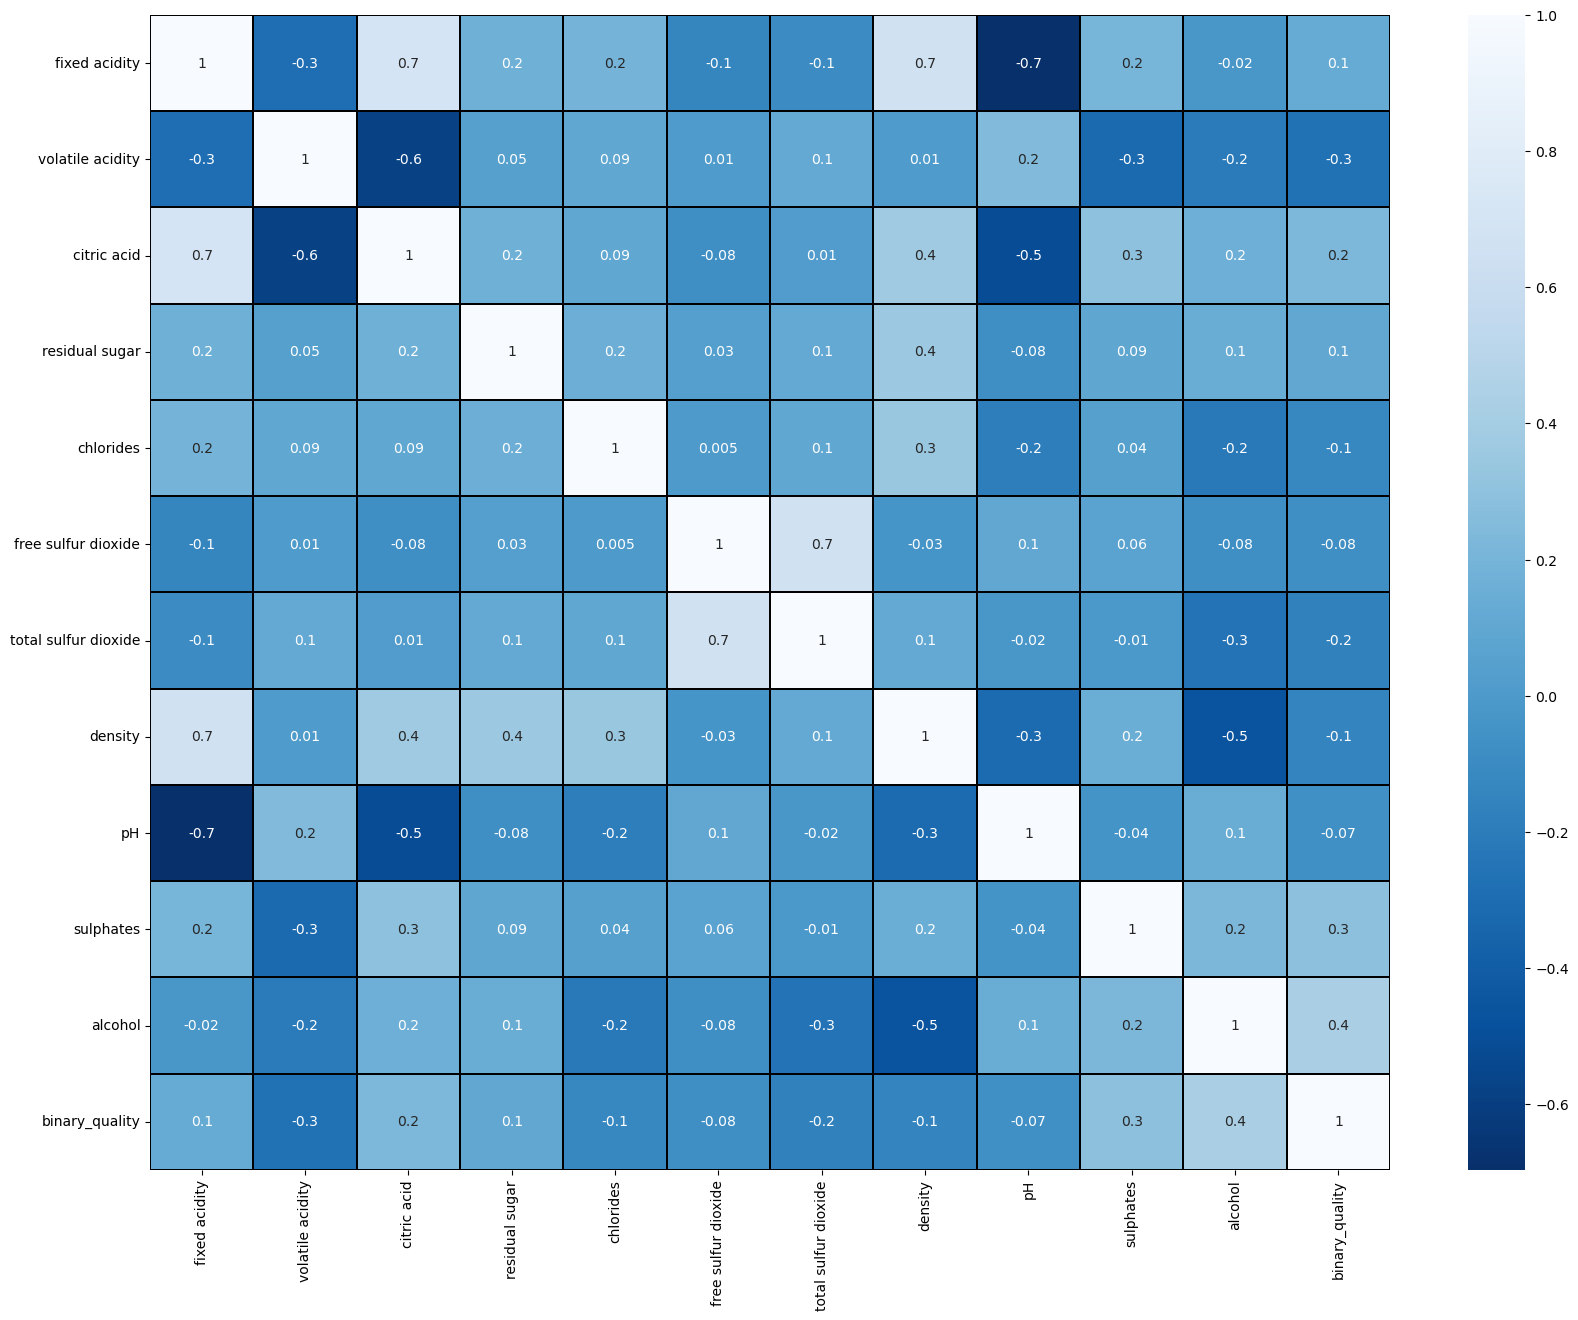

In [51]:

plt.figure(figsize = (20,15))
sns.heatmap(df1.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.show()

0 - no relation,0.3 to +0.3 less corelation, greater thab -0.5 to +0.5 moderate corelation, greater than -0.7 to +0.7 is high correlation

This heatmap shows the correlation matrix by visualizing the data. we can observe relation b/w feature to feature and feature to label This heatmap contains both negative and positive correlation 
1)There is no much positive correlation b/w taget and features.
2)The column Volatile acidity have negative correlation with label column 'quality' 
3)The column pH and fixed acidity have -ve correlation , -vevolatile acidity and citric b/w each other,free sulfur dioxide and total sulfur dioxide have +ve correlatin.

In [52]:
cor['binary_quality'].sort_values(ascending=False)

binary_quality          1.000000
alcohol                 0.424558
sulphates               0.287965
citric acid             0.225106
fixed acidity           0.128026
residual sugar          0.101768
pH                     -0.073194
free sulfur dioxide    -0.078859
chlorides              -0.128685
density                -0.147390
total sulfur dioxide   -0.170821
volatile acidity       -0.268602
Name: binary_quality, dtype: float64

# Visualizing the correlation between label and features using bar plot

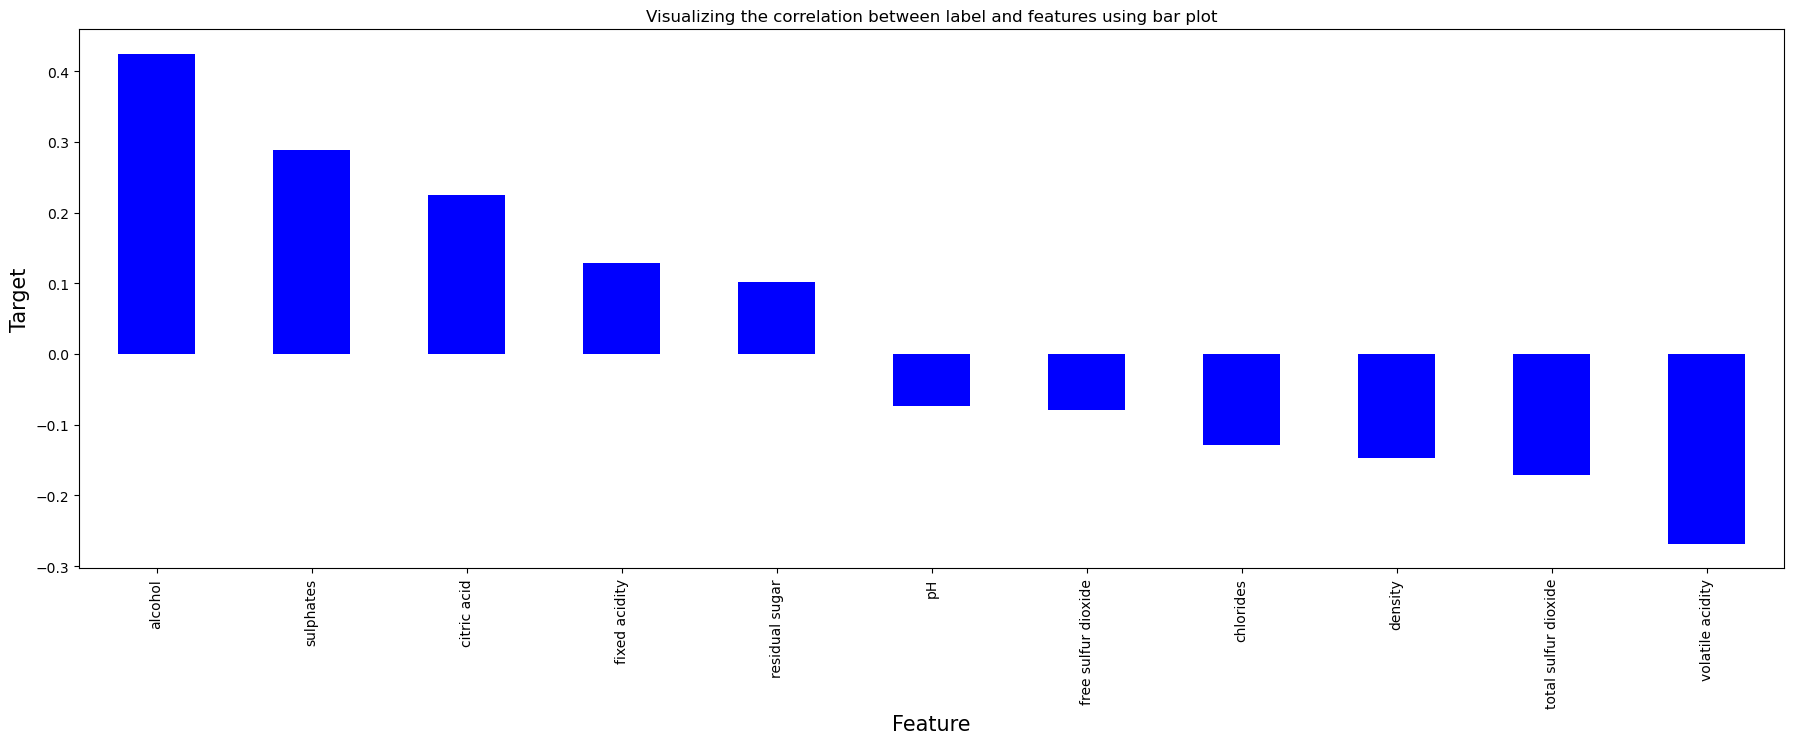

In [53]:
#Visualizing the correlation between label and features using bar plot

plt.figure(figsize=(22,7))
df1.corr()['binary_quality'].sort_values(ascending=False).drop(['binary_quality']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Visualizing the correlation between label and features using bar plot')
plt.show()

As we can seen that alcohol, sulphates citric acid has +ve postive correlation with target label quality in high to low order as given 
and -ve correlation fetures are volatile acid, total sulfur dioxide, density as these value are low quality of the red wine will tend to increse as these variable are inversely proportion to target variable

# Separating features and label

In [54]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

# Feature Scaling using Standard Scalarization


In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.549717          1.025392    -1.388177       -0.570286  -0.264397   
1         -0.307073          2.081202    -1.388177        0.232287   0.833700   
2         -0.307073          1.377329    -1.178440       -0.111673   0.534219   
3          1.755401         -1.438163     1.548134       -0.570286  -0.314310   
4         -0.549717          1.025392    -1.388177       -0.570286  -0.264397   
...             ...               ...          ...             ...        ...   
1476      -1.277649          0.438831    -0.968704       -0.455633   0.434392   
1477      -1.459632          0.145551    -0.863835       -0.226326  -0.963185   
1478      -1.216988         -0.089073    -0.706533       -0.111673  -0.264397   
1479      -1.459632          0.702784    -0.758967       -0.455633  -0.314310   
1480      -1.398971         -1.262195     1.076227        1.378820  -0.713618   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.457632             -0.355832  0.624904  1.376627   
1                0.947349              0.710551  0.046730 -0.821944   
2               -0.056209              0.290461  0.162365 -0.396414   
3                0.144503              0.484348  0.740539 -1.105631   
4               -0.457632             -0.355832  0.624904  1.376627   
...                   ...                   ...       ...       ...   
1476             1.649840             -0.032686 -1.051801  0.951097   
1477             2.352331              0.193517 -0.924602  1.447549   
1478             1.348773             -0.161944 -0.566134  0.738332   
1479             1.649840             -0.032686 -0.722241  1.802157   
1480             0.244859             -0.097315 -0.710678  0.525567   

      sulphates   alcohol  
0     -0.629737 -0.996233  
1      0.259551 -0.603534  
2      0.037229 -0.603534  
3     -0.481522 -0.603534  
4     -0.629737 -0.996233  
...         ...       ...  
1476  -0.481522  0.083691  
1477   0.852409  0.770915  
1478   0.778302  0.574565  
1479   0.481873 -0.210834  
1480   0.111336  0.574565  

[1481 rows x 11 columns]

# Checking Variance Inflation Factor(VIF)

In [56]:
# Finding variance inflation factor in each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

VIF values              Features
0     7.824551         fixed acidity
1     1.853493      volatile acidity
2     3.187406           citric acid
3     1.655040        residual sugar
4     1.183884             chlorides
5     1.958389   free sulfur dioxide
6     2.237402  total sulfur dioxide
7     6.403903               density
8     3.165892                    pH
9     1.291294             sulphates
10    3.156217               alcohol

By checking VIF values we can find the features causing multicollinearity problem.Here we can find the feature fixed acidity and density have VIF value greater than 6 which means they have high correlation with other features.We will drop one of the column first,if the same VIF value exist then remove columns with high VIF

In [57]:
x.drop(["fixed acidity"],axis=1,inplace=True)
x

volatile acidity  citric acid  residual sugar  chlorides  \
0             1.025392    -1.388177       -0.570286  -0.264397   
1             2.081202    -1.388177        0.232287   0.833700   
2             1.377329    -1.178440       -0.111673   0.534219   
3            -1.438163     1.548134       -0.570286  -0.314310   
4             1.025392    -1.388177       -0.570286  -0.264397   
...                ...          ...             ...        ...   
1476          0.438831    -0.968704       -0.455633   0.434392   
1477          0.145551    -0.863835       -0.226326  -0.963185   
1478         -0.089073    -0.706533       -0.111673  -0.264397   
1479          0.702784    -0.758967       -0.455633  -0.314310   
1480         -1.262195     1.076227        1.378820  -0.713618   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.457632             -0.355832  0.624904  1.376627   
1                0.947349              0.710551  0.046730 -0.821944   
2               -0.056209              0.290461  0.162365 -0.396414   
3                0.144503              0.484348  0.740539 -1.105631   
4               -0.457632             -0.355832  0.624904  1.376627   
...                   ...                   ...       ...       ...   
1476             1.649840             -0.032686 -1.051801  0.951097   
1477             2.352331              0.193517 -0.924602  1.447549   
1478             1.348773             -0.161944 -0.566134  0.738332   
1479             1.649840             -0.032686 -0.722241  1.802157   
1480             0.244859             -0.097315 -0.710678  0.525567   

      sulphates   alcohol  
0     -0.629737 -0.996233  
1      0.259551 -0.603534  
2      0.037229 -0.603534  
3     -0.481522 -0.603534  
4     -0.629737 -0.996233  
...         ...       ...  
1476  -0.481522  0.083691  
1477   0.852409  0.770915  
1478   0.778302  0.574565  
1479   0.481873 -0.210834  
1480   0.111336  0.574565  

[1481 rows x 10 columns]

In [58]:
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

VIF values              Features
0    1.849537      volatile acidity
1    2.835327           citric acid
2    1.412980        residual sugar
3    1.171874             chlorides
4    1.929841   free sulfur dioxide
5    2.111459  total sulfur dioxide
6    2.590052               density
7    1.516524                    pH
8    1.275083             sulphates
9    2.253836               alcohol

As we can seen that now all the value are in range so it show multicollinearity is remove by droping fixed acidity column.Now we can move to next step for model building

In [59]:
y.value_counts()

0    1280
1     201
Name: binary_quality, dtype: int64

Here we can observe that the data for target column is not balanced or biasness is present

#Oversampling

In [60]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [61]:
y1.value_counts()

0    1280
1    1280
Name: binary_quality, dtype: int64

# Modelling

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size = 0.30,random_state= i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    predRFC=RFC.predict(x_test)
    acc=accuracy_score(y_test,predRFC)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu,"at random_state", maxRS)

Best accuracy is  0.9661458333333334 at random_state 121


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

# Classification Algorithms


In [64]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [65]:
#Checking accuracy for RandomForestClassifier
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC= RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9596354166666666
[[382  22]
 [  9 355]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       404
           1       0.94      0.98      0.96       364

    accuracy                           0.96       768
   macro avg       0.96      0.96      0.96       768
weighted avg       0.96      0.96      0.96       768



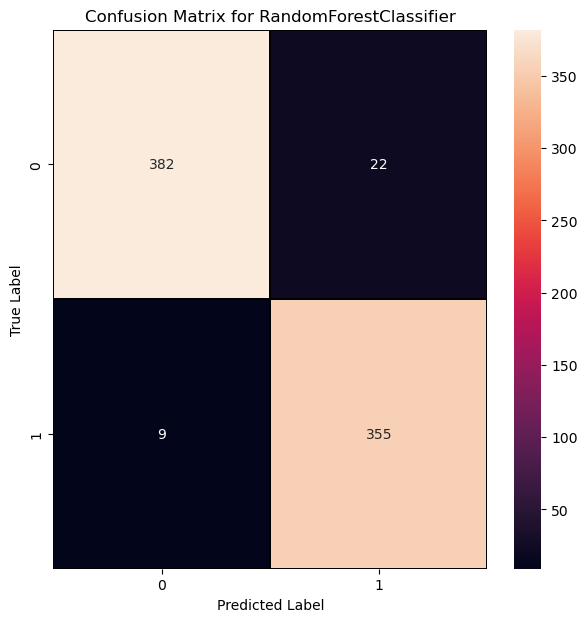

In [66]:
#Graphical confusion matrix for RandomForestClassifier

cm=confusion_matrix(y_test,predRFC)

x_axis_label=["0","1"]
y_axis_label=["0","1"]

fig,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True,linewidths = 0.2, linecolor="black",fmt=".0f",ax=ax,xticklabels=x_axis_label,yticklabels=y_axis_label)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for RandomForestClassifier")
plt.show()

In [67]:
#Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR= LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8177083333333334
[[322  82]
 [ 58 306]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       404
           1       0.79      0.84      0.81       364

    accuracy                           0.82       768
   macro avg       0.82      0.82      0.82       768
weighted avg       0.82      0.82      0.82       768



In [68]:
#Checking accuracy for Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.90234375
[[347  57]
 [ 18 346]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       404
           1       0.86      0.95      0.90       364

    accuracy                           0.90       768
   macro avg       0.90      0.90      0.90       768
weighted avg       0.91      0.90      0.90       768



In [69]:
#Checking accuracy for Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB= GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9166666666666666
[[361  43]
 [ 21 343]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       404
           1       0.89      0.94      0.91       364

    accuracy                           0.92       768
   macro avg       0.92      0.92      0.92       768
weighted avg       0.92      0.92      0.92       768



In [70]:
#Checking accuracy for AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC= ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.87109375
[[340  64]
 [ 35 329]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       404
           1       0.84      0.90      0.87       364

    accuracy                           0.87       768
   macro avg       0.87      0.87      0.87       768
weighted avg       0.87      0.87      0.87       768



In [71]:
#Checking accuracy for BaggingClassifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC= BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9270833333333334
[[375  29]
 [ 27 337]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       404
           1       0.92      0.93      0.92       364

    accuracy                           0.93       768
   macro avg       0.93      0.93      0.93       768
weighted avg       0.93      0.93      0.93       768



In [72]:
#Checking accuracy for ExtraTreesClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET= ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9661458333333334
[[380  24]
 [  2 362]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       404
           1       0.94      0.99      0.97       364

    accuracy                           0.97       768
   macro avg       0.97      0.97      0.97       768
weighted avg       0.97      0.97      0.97       768



Accuracy score for RandomForestClassifier is 95.96 and ExtraTreesClassifier is 96.61   So best model performance is 96.61

# Spliting train test data using Cross validation score

In [78]:
from sklearn.model_selection import cross_val_score

#Checking cv score for random forest classifier

***cv=5 its a fold value 1,2,3,4,5

cross_val_score(modelname,features, targetvariable, cv= foldvalue,scoring="accuracy")

in classification algorithm default scoring parameter is accuracy
in regression algorithm default scoring parameter is r2 score ****




In [79]:
#Checking cv score for random forest classifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :",accuracy_score(y_test,predRFC)-score.mean())

[0.96679688 0.90429688 0.93945312 0.88085938 0.91796875]
0.921875
Difference between Accuracy score and Cross validation score is : 0.03776041666666663


In [80]:
#Checking cv score for Logistic classifier
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :",accuracy_score(y_test,predLR)-score.mean())

[0.88671875 0.76757812 0.83007812 0.74414062 0.828125  ]
0.811328125
Difference between Accuracy score and Cross validation score is : 0.006380208333333415


In [81]:
#Checking cv score for GradientBoostingClassifier
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :",accuracy_score(y_test,predGB)-score.mean())


[0.91015625 0.85742188 0.91015625 0.8203125  0.8671875 ]
0.873046875
Difference between Accuracy score and Cross validation score is : 0.04361979166666663


In [82]:
#Checking cv score for SupportVectorMachine classifier
score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :",accuracy_score(y_test,predsvc)-score.mean())

[0.94726562 0.84375    0.89648438 0.81445312 0.87304688]
0.875
Difference between Accuracy score and Cross validation score is : 0.02734375


In [83]:
#Checking cv score for Adaboosting classifier
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :",accuracy_score(y_test,predABC)-score.mean())

[0.87109375 0.82421875 0.8828125  0.77929688 0.84179688]
0.83984375
Difference between Accuracy score and Cross validation score is : 0.03125


In [84]:
#Checking cv score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :", accuracy_score(y_test, predBC)-score.mean())

[0.88215488 0.85135135 0.89189189 0.88175676 0.86148649]
0.8737282737282739
Difference between Accuracy score and Cross validation score is : 0.053355059605059485


In [85]:
#Checking cv score for ExtraTrees classifier
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :",accuracy_score(y_test,predET)-score.mean())

[0.98242188 0.90429688 0.9453125  0.8984375  0.93945312]
0.933984375
Difference between Accuracy score and Cross validation score is : 0.03216145833333339


# Hyper Parameter Tuning

In [86]:
# ExtraTrees classifier
from sklearn.model_selection import GridSearchCV

In [90]:
parameters = {"criterion" : ["gini","entropy"],
             "random_state" : [10,50,1000],
             "max_depth" : [None,10,20],
             "n_jobs" : [-2,-1,1],
             "n_estimators" : [50,100,200,300]}

In [88]:
GCV= GridSearchCV(ExtraTreesClassifier(max_depth=None),parameters, cv = 5)

In [89]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [91]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 50}

In [92]:
ET_model=ExtraTreesClassifier(criterion = "entropy",max_depth = None, n_jobs =-2, n_estimators= 100, random_state= 50)
ET_model.fit(x_train,y_train)
pred=ET_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

96.22395833333334
[[378  26]
 [  3 361]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       404
           1       0.93      0.99      0.96       364

    accuracy                           0.96       768
   macro avg       0.96      0.96      0.96       768
weighted avg       0.96      0.96      0.96       768



In [93]:
ET_model=ExtraTreesClassifier(criterion = "gini",max_depth = None, n_jobs =-2, n_estimators= 100, random_state= 50)
ET_model.fit(x_train,y_train)
pred=ET_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

96.61458333333334
[[382  22]
 [  4 360]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       404
           1       0.94      0.99      0.97       364

    accuracy                           0.97       768
   macro avg       0.97      0.97      0.97       768
weighted avg       0.97      0.97      0.97       768



# AUC ROC CURVE

In [94]:
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [95]:
y_pred_prob = ET_model.predict_proba(x_test)[:, 1]

In [96]:
y_pred_prob

array([0.66, 0.07, 0.  , 1.  , 0.41, 0.1 , 0.48, 0.04, 0.11, 0.03, 0.59,
       0.91, 0.99, 0.93, 0.  , 0.02, 0.27, 0.  , 0.21, 0.32, 1.  , 0.01,
       0.08, 0.02, 0.18, 0.83, 0.61, 0.27, 0.62, 1.  , 0.94, 0.95, 0.07,
       0.86, 0.78, 0.95, 0.07, 0.74, 0.  , 0.97, 0.03, 0.31, 0.99, 0.6 ,
       0.64, 1.  , 0.27, 0.17, 0.  , 0.  , 0.  , 1.  , 0.01, 0.  , 0.86,
       0.97, 1.  , 0.03, 0.03, 1.  , 0.13, 0.1 , 0.  , 0.25, 0.99, 0.95,
       1.  , 0.97, 0.97, 0.13, 0.02, 1.  , 0.92, 0.93, 0.15, 0.16, 0.02,
       0.23, 0.09, 0.54, 0.99, 0.  , 0.98, 0.01, 0.91, 0.05, 0.08, 0.01,
       0.14, 0.96, 0.  , 0.  , 0.44, 1.  , 1.  , 0.05, 0.09, 1.  , 0.94,
       0.99, 0.99, 0.01, 0.72, 0.04, 0.85, 0.91, 0.79, 0.  , 0.  , 0.3 ,
       1.  , 0.03, 0.98, 0.03, 1.  , 0.01, 0.98, 0.  , 1.  , 0.73, 0.05,
       0.99, 0.  , 1.  , 0.  , 0.07, 1.  , 0.92, 0.  , 0.05, 0.97, 0.6 ,
       0.89, 0.24, 0.91, 0.97, 0.9 , 0.94, 0.84, 0.2 , 0.17, 1.  , 0.72,
       0.  , 0.3 , 0.95, 0.77, 0.9 , 0.01, 0.  , 0.

In [97]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [98]:
tpr

array([0.        , 0.29395604, 0.38461538, 0.4478022 , 0.49725275,
       0.53571429, 0.57967033, 0.6043956 , 0.63461538, 0.66758242,
       0.6978022 , 0.72252747, 0.75824176, 0.76923077, 0.78296703,
       0.79395604, 0.80769231, 0.82142857, 0.82417582, 0.84065934,
       0.8489011 , 0.85989011, 0.86538462, 0.88461538, 0.89285714,
       0.8956044 , 0.9010989 , 0.91208791, 0.91758242, 0.92857143,
       0.93956044, 0.93956044, 0.94230769, 0.94230769, 0.95054945,
       0.95604396, 0.95879121, 0.95879121, 0.96153846, 0.96428571,
       0.97252747, 0.97527473, 0.98076923, 0.98076923, 0.98626374,
       0.98626374, 0.98901099, 0.98901099, 0.99175824, 0.99450549,
       0.99725275, 0.99725275, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [99]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00247525,
       0.00247525, 0.00247525, 0.0049505 , 0.0049505 , 0.0049505 ,
       0.0049505 , 0.0049505 , 0.0049505 , 0.00742574, 0.00990099,
       0.01237624, 0.01485149, 0.01485149, 0.01485149, 0.01732673,
       0.01732673, 0.01980198, 0.01980198, 0.02227723, 0.02722772,
       0.03217822, 0.03217822, 0.03465347, 0.03712871, 0.03712871,
       0.03712871, 0.03960396, 0.03960396, 0.04207921, 0.04207921,
       0.0519802 , 0.05445545, 0.05693069, 0.05693069, 0.06188119,
       0.06188119, 0.06683168, 0.07425743, 0.07673267, 0.08663366,
       0.10148515, 0.10643564, 0.12623762, 0.13366337, 0.13861386,
       0.14356436, 0.15346535, 0.18316832, 0.19059406, 0.2029703 ,
       0.20792079, 0.22029703, 0.22277228, 0.22772277, 0.23762376,
       0.2450495 , 0.26237624, 0.27722772, 0.28960396, 0.30445

In [100]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 ,
       0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69,
       0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.58, 0.56,
       0.55, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46, 0.45, 0.44, 0.42,
       0.4 , 0.38, 0.37, 0.36, 0.35, 0.33, 0.31, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.12,
       0.11, 0.1 , 0.08, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.  ])

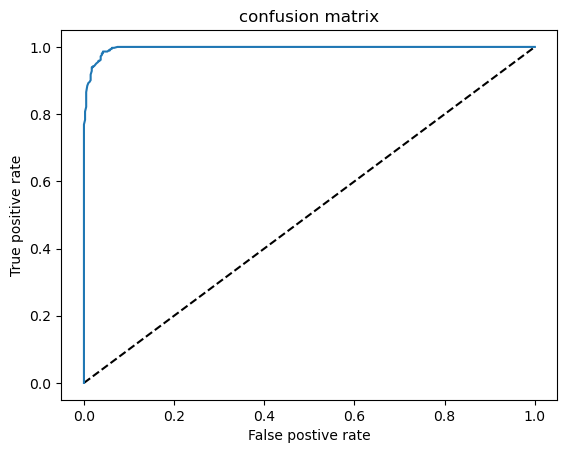

In [101]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="ExtraTreeClassifier")
plt.xlabel("False postive rate")
plt.ylabel("True positive rate")
plt.title("confusion matrix")
plt.show()

In [102]:
auc_score=roc_auc_score(y_test,ET_model.predict(x_test))

In [103]:
print(auc_score)

0.9672777717332173


# Saving the model

In [104]:
#Saving the model using .pkl

import joblib
joblib.dump(ET_model,"Red_wine_quality_analysis.pkl")

['Red_wine_quality_analysis.pkl']

# Predicting the saved model

In [105]:
#lets load the saved model and get the predictions

model=joblib.load("Red_wine_quality_analysis.pkl")

In [106]:
#Prediction
prediction=model.predict(x_test)
prediction

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [107]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"] = prediction
df["Observed"] =a

df

Predicted  Observed
0            1         1
1            0         0
2            0         0
3            1         1
4            0         0
..         ...       ...
763          0         0
764          1         1
765          1         1
766          1         1
767          0         0

[768 rows x 2 columns]